# Capstone Project: "Transforming Neighborhoods by Predicting Crime Outcomes in the UK
# Name: Marina Mnoyan
# Contact: marina.mnoyan@gmail.com
# Date: July 4, 2022
# Project Purpose:
Help policymakers to identify and address the factors that influence whether crimes are solved. The main dataset was downloaded from the UK Police Department website. Additional datasets were acquired from various UK Government sources in order to provide neighborhood-level characteristics. 


# Project Framework & Deliverables

    1. Data Acquisition, pre-processing with MS Excel & Git Bash       MS Excel, Git Bash (details in the ReadMe text file)         2. Main dataset Wrangling, Processing & Cleaning                   Jupyter Notebook 1     
    3. Additional dataset Merging, Wrangling, Processing & Cleaning    Jupyter Notebook 2    
    4. Exploratory Data Analysis & Visualizations                      Jupyter Notebook 3     
                                                                       Tableau File
    5. Feature Engineering                                             Jupyter Notebook 4     
    6. Modeling & Evaluation                                           Jupyter Notebook 5     <== current notebook
    7. Findings & Recommendations                                      PDF Business Report
                                                                       PDF Presentation
    8. Additional Information including links to original data         ReadMe text file# STOP HERE

# Jupyter Notebook 5 of 5: Modeling & Evaluation
Steps:
* [1. Importing the dataset](#1)

* [2. Logistic Model](#2)
    * [2a) Base Model](2a)
    * [2b) Scaled Model](2b)
    * [2c) Scaled Model with Optimized C-value](2c)
    * [2d) Scaled & Log-transformed Model](2d)
    * [2e) Scaled Model with Feature Selection (Threshold Variance)](2e)
    * [2f) Scaled Model with Feature Selection (Threshold Variance & p-values)](2f)
    * [2g) Scaled Model with Feature Selection (KBest)](2g)

* [3. Decision Tree](#3)

* [4. Random Forests](#4)

* [5. Model Evaluation](#5)
    * [5a) Selecting best model](5a)
    * [5b) Scoring the best model on test](5b)
    * [5c) Model Interpretation](5c)

<a id='1'></a>
## 1. Importing the dataset from Jupyter Notebook #4

First, we will import packages that will help with modeling & evaluation:

In [1]:
# Import basic data science packages
import numpy as np
import pandas as pd

# Import stats packages
from scipy.stats import chi2_contingency 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2

# Import advanced packages
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import DecisionTreeClassifier

# Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

Then we need to make CSV files readable for Jupyter Notebook. We will import the file created at the end of Jupyter Notebook 4.

In [2]:
# Importing the CSV file
df = pd.read_csv('data/df_crime_model.csv', index_col=False)

Let's perform some very basic checks to make sure everything was imported properly:

In [3]:
# Getting the option display all columns in the dataset
pd.get_option("display.max_columns")

# Setting to display all columns in the dataset
pd.set_option("display.max_columns", None)

# Checking the first 5 rows of the dataset
df.head()

Month  Longitude   Latitude        Last outcome category  Population  \
0    1.0  -2.511927  51.409435  Unable to prosecute suspect      2161.0   
1    1.0  -2.511761  51.409966  Unable to prosecute suspect      2161.0   
2    1.0  -2.511761  51.409966  Unable to prosecute suspect      2161.0   
3    1.0  -2.511927  51.409435  Unable to prosecute suspect      2161.0   
4    2.0  -2.515816  51.408720  Unable to prosecute suspect      2161.0   

   Proportion_Males  Proportion_0-15  Proportion_16-29  Proportion_30-44  \
0          0.467376         0.176307          0.135585          0.210088   
1          0.467376         0.176307          0.135585          0.210088   
2          0.467376         0.176307          0.135585          0.210088   
3          0.467376         0.176307          0.135585          0.210088   
4          0.467376         0.176307          0.135585          0.210088   

   Proportion_45-64  Proportion_65+  Proportion_0car_hhlds  #_ppl_hhld  \
0          0.204535        0.273484               0.109399    0.300324   
1          0.204535        0.273484               0.109399    0.300324   
2          0.204535        0.273484               0.109399    0.300324   
3          0.204535        0.273484               0.109399    0.300324   
4          0.204535        0.273484               0.109399    0.300324   

   Deprivation_Index  Job_Seeker_Allowance_Proportion  FSM11to15Proportion  \
0            19195.0                         0.940975                 0.06   
1            19195.0                         0.940975                 0.06   
2            19195.0                         0.940975                 0.06   
3            19195.0                         0.940975                 0.06   
4            19195.0                         0.940975                 0.06   

   FSM5to10Proportion  WBR Proportion  WAO Proportion  ABD Proportion  \
0            0.152941        0.955665        0.014778             0.0   
1            0.152941        0.955665        0.014778             0.0   
2            0.152941        0.955665        0.014778             0.0   
3            0.152941        0.955665        0.014778             0.0   
4            0.152941        0.955665        0.014778             0.0   

   AIN Proportion  APK Proportion  BAF Proportion  BCA Proportion  \
0        0.001847             0.0         0.00431        0.000616   
1        0.001847             0.0         0.00431        0.000616   
2        0.001847             0.0         0.00431        0.000616   
3        0.001847             0.0         0.00431        0.000616   
4        0.001847             0.0         0.00431        0.000616   

   OXX Proportion  MIX Proportion  AAB Proportion  Area Sq Km  \
0        0.001232         0.01601        0.005542        4.12   
1        0.001232         0.01601        0.005542        4.12   
2        0.001232         0.01601        0.005542        4.12   
3        0.001232         0.01601        0.005542        4.12   
4        0.001232         0.01601        0.005542        4.12   

   Population_Density  Median_House_Price  Median_house_price_CAGR_1995-2021  \
0               524.0            370000.0                           0.078015   
1               524.0            370000.0                           0.078015   
2               524.0            370000.0                           0.078015   
3               524.0            370000.0                           0.078015   
4               524.0            370000.0                           0.078015   

   Median Age  Proportion of Religious  ('Avon and Somerset Constabulary',)  \
0        41.6                 0.599754                                    1   
1        41.6                 0.599754                                    1   
2        41.6                 0.599754                                    1   
3        41.6                 0.599754                                    1   
4        41.6                 0.599754                      

In [4]:
# Checking the size of the dataset
df.shape

(3253839, 89)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253839 entries, 0 to 3253838
Data columns (total 89 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Month                                float64
 1   Longitude                            float64
 2   Latitude                             float64
 3   Last outcome category                object 
 4   Population                           float64
 5   Proportion_Males                     float64
 6   Proportion_0-15                      float64
 7   Proportion_16-29                     float64
 8   Proportion_30-44                     float64
 9   Proportion_45-64                     float64
 10  Proportion_65+                       float64
 11  Proportion_0car_hhlds                float64
 12  #_ppl_hhld                           float64
 13  Deprivation_Index                    float64
 14  Job_Seeker_Allowance_Proportion      float64
 15  FSM11to15Proportion             

We see that that we forgot do drop the `Last outcome category` column after converting it to Suspect Identified. Dropping it now:

In [6]:
# Dropping the column
df.drop(axis=0, columns='Last outcome category', inplace=True)

In [7]:
# Checking
df.head()

Month  Longitude   Latitude  Population  Proportion_Males  Proportion_0-15  \
0    1.0  -2.511927  51.409435      2161.0          0.467376         0.176307   
1    1.0  -2.511761  51.409966      2161.0          0.467376         0.176307   
2    1.0  -2.511761  51.409966      2161.0          0.467376         0.176307   
3    1.0  -2.511927  51.409435      2161.0          0.467376         0.176307   
4    2.0  -2.515816  51.408720      2161.0          0.467376         0.176307   

   Proportion_16-29  Proportion_30-44  Proportion_45-64  Proportion_65+  \
0          0.135585          0.210088          0.204535        0.273484   
1          0.135585          0.210088          0.204535        0.273484   
2          0.135585          0.210088          0.204535        0.273484   
3          0.135585          0.210088          0.204535        0.273484   
4          0.135585          0.210088          0.204535        0.273484   

   Proportion_0car_hhlds  #_ppl_hhld  Deprivation_Index  \
0               0.109399    0.300324            19195.0   
1               0.109399    0.300324            19195.0   
2               0.109399    0.300324            19195.0   
3               0.109399    0.300324            19195.0   
4               0.109399    0.300324            19195.0   

   Job_Seeker_Allowance_Proportion  FSM11to15Proportion  FSM5to10Proportion  \
0                         0.940975                 0.06            0.152941   
1                         0.940975                 0.06            0.152941   
2                         0.940975                 0.06            0.152941   
3                         0.940975                 0.06            0.152941   
4                         0.940975                 0.06            0.152941   

   WBR Proportion  WAO Proportion  ABD Proportion  AIN Proportion  \
0        0.955665        0.014778             0.0        0.001847   
1        0.955665        0.014778             0.0        0.001847   
2        0.955665        0.014778             0.0        0.001847   
3        0.955665        0.014778             0.0        0.001847   
4        0.955665        0.014778             0.0        0.001847   

   APK Proportion  BAF Proportion  BCA Proportion  OXX Proportion  \
0             0.0         0.00431        0.000616        0.001232   
1             0.0         0.00431        0.000616        0.001232   
2             0.0         0.00431        0.000616        0.001232   
3             0.0         0.00431        0.000616        0.001232   
4             0.0         0.00431        0.000616        0.001232   

   MIX Proportion  AAB Proportion  Area Sq Km  Population_Density  \
0         0.01601        0.005542        4.12               524.0   
1         0.01601        0.005542        4.12               524.0   
2         0.01601        0.005542        4.12               524.0   
3         0.01601        0.005542        4.12               524.0   
4         0.01601        0.005542        4.12               524.0   

   Median_House_Price  Median_house_price_CAGR_1995-2021  Median Age  \
0            370000.0                           0.078015        41.6   
1            370000.0                           0.078015        41.6   
2            370000.0                           0.078015        41.6   
3            370000.0                           0.078015        41.6   
4            370000.0                           0.078015        41.6   

   Proportion of Religious  ('Avon and Somerset Constabulary',)  \
0                 0.599754                                    1   
1                 0.599754                                    1   
2                 0.599754                                    1   
3                 0.599754                                    1   
4                 0.599754                                    1   

   ('Bedfordshire Police',)  ('Cambridgeshire Constabulary',)  \
0                         0                                 0   
1                       

Everything checks out however we have encountered a lot of laptop crashes due to the size of the data. We will continue with a sample of data, stratified by our y variable and will assume that findings can be applied to the larger dataset.

In [8]:
# Assign X and y
X = df.drop(columns='Suspect Identified')
y = df['Suspect Identified']

In [9]:
# Taking 10% of data for future use
X_donotuse, X, y_donotuse, y = \
    train_test_split(X, y, test_size = 0.1,
                     random_state=2307)

In [10]:
#Sanity check
print(X.shape)
print(y.shape)

(325384, 87)
(325384,)


<a id='2'></a>
## 2) Logistic Model

We do not need to assign X and y since we already completed this at the previous step while taking a sample.

Next, we will split our dataset into Train, Validation and Test set. Where we will be using Cross-Validation, we will not use the validation set. 

We will not use the Test set until model evaluations at the end.

In [11]:
# Taking 20% for our test set
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size = 0.2,
                     random_state=2307)


# Splitting the remainder into train and validation sets (70% and 30% respectively)
X_train, X_validation, y_train, y_validation = \
    train_test_split(X_remainder, y_remainder, test_size = 0.3,
                     random_state=2307)

Now let's check the size of all three groups:

In [12]:
print(f'Shape of test set: {X_test.shape}')
print(f'Shape of validation set: {X_validation.shape}')
print(f'Shape of train set: {X_train.shape}')

Shape of test set: (65077, 87)
Shape of validation set: (78093, 87)
Shape of train set: (182214, 87)


<a id='2a'></a>
### 2a) Base Model

Now let's fit our base logistic model:

In [13]:
# Instanitate base model choosing a random state so that results are reproducible
logreg_base = LogisticRegression(random_state=2307, max_iter=10000)

# Fit model 
logreg_base.fit(X_train, y_train)

# Score the model
scores_train_base = logreg_base.score(X_train, y_train)
scores_validation_base = logreg_base.score(X_validation, y_validation)

# Print the accuracy scores
print("Score on train, base logistic model:", "{:.2f}".format(scores_train_base))
print("Score on validation, base logistic model:", "{:.2f}".format(scores_validation_base))

Score on train, base logistic model: 0.62
Score on validation, base logistic model: 0.61


Given that we are primarily interested in model explainability, we will primarily use accuracy and f1-scores to evaluate our models. 

In [14]:
# Get class predictions
y_pred = logreg_base.predict(X_validation)

# Generate confusion matrix
cf_matrix_base = confusion_matrix(y_validation, y_pred)

# label rows and columns
cf_df_base = pd.DataFrame(
    cf_matrix_base, 
    columns=["Predicted Suspect Not Identified", "Predicted Suspect Identified"],
    index=["True Suspect Not Identified", "True Suspect Identified"]
)

display(cf_df_base)

Predicted Suspect Not Identified  \
True Suspect Not Identified                             14223   
True Suspect Identified                                  8790   

                             Predicted Suspect Identified  
True Suspect Not Identified                         21314  
True Suspect Identified                             33766

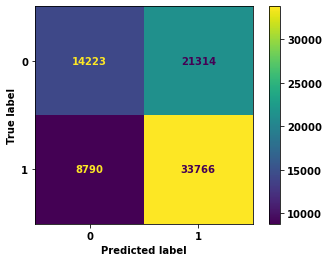

In [15]:
# The function expects the estimator, inputs and target as parameters
plot_confusion_matrix(logreg_base, X_validation, y_validation);

Looks like precision is fairly stable (~60% for both classes) but our recall is much better for class 1 at 79%.

In [16]:
# Calculating the F1 score
f1_score(y_validation, y_pred)

# Printing the report
report_base = classification_report(y_validation, y_pred)
print(report_base)

              precision    recall  f1-score   support

           0       0.62      0.40      0.49     35537
           1       0.61      0.79      0.69     42556

    accuracy                           0.61     78093
   macro avg       0.62      0.60      0.59     78093
weighted avg       0.62      0.61      0.60     78093



In [17]:
# Making sure that displayed floats are not in scientific format which is hard to read
pd.options.display.float_format = "{:,.2f}".format

As we can see, the base model's performance is not that great at 62%, even though it is still better than our class imbalance. We will be keeping score of accuracy and f1 scores of all models in a dataframe, for ease of evaluation later:

In [18]:
# Keeping score
model_scores = pd.DataFrame({'Name': ["Base Logistic Model"], 'Transformation': ["None"], 'Optimization': ["None"], 'Features': ['87'], 'Accuracy on Validation': [scores_validation_base.mean()*100], 'F1-score on Validation': [f1_score(y_validation, y_pred)*100]})

Let's take a look at our current scores:

In [19]:
# Displays in a better format without the print function
model_scores

Name Transformation Optimization Features  \
0  Base Logistic Model           None         None       87   

   Accuracy on Validation  F1-score on Validation  
0                   61.45                   69.17

Looks like our base model is performing better on F1 score compared to accuracy. 

<a id='2b'></a>
### 2b) Scaled Model

Now that we have a baseline, let's try a few things that we could have done at the feature engineering stage. Specifically, let's start with scaling. While the majority of our data is between 0 and 1, there are some features (e.g., house price or population) that are significantly higher which may cause improper modeling.

We decided to use MinMaxScaler as the majority of our data is between 0 and 1. Additionally, we will be attempting a log transformation later which would be harder to do on negative data.

In [20]:
# Make a scaler
my_minmax_scaler = MinMaxScaler()

# Fit the scaler
my_minmax_scaler.fit(X_train)

# Transform the data. We get back a numpy array
# We are not transforming the test data yet as we want to see which data works best (transformed or not transformed)
X_train_scaled = my_minmax_scaler.transform(X_train)
X_validation_scaled = my_minmax_scaler.transform(X_validation)

Now we can fit our model on scaled data.

In [21]:
# Instanitate base model choosing a random state so that results are reproducible
logreg_scaled = LogisticRegression(random_state=2307, max_iter=10000)

# Fit model 
logreg_scaled.fit(X_train_scaled, y_train)

# Score the model
scores_train_scaled = logreg_scaled.score(X_train_scaled, y_train)
scores_validation_scaled = logreg_scaled.score(X_validation_scaled, y_validation)

# Print the accuracy scores
print("Score on train, logistic model on scaled data:", "{:.2f}".format(scores_train_scaled))
print("Score on validation, logistic model on scaled data:", "{:.2f}".format(scores_validation_scaled))

Score on train, logistic model on scaled data: 0.81
Score on validation, logistic model on scaled data: 0.81


Now let's look at confusion matrix and f1 scores:

In [22]:
# Get class predictions
y_pred = logreg_scaled.predict(X_validation_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_validation, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Suspect Not Identified", "Predicted Suspect Identified"],
    index=["True Suspect Not Identified", "True Suspect Identified"]
)

display(cf_df)

Predicted Suspect Not Identified  \
True Suspect Not Identified                             27730   
True Suspect Identified                                  6784   

                             Predicted Suspect Identified  
True Suspect Not Identified                          7807  
True Suspect Identified                             35772

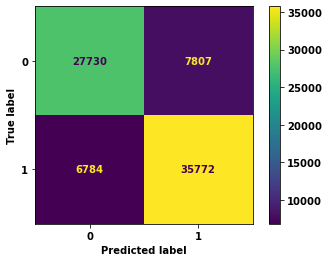

In [23]:
# The function expects the estimator, inputs and target as parameters
plot_confusion_matrix(logreg_scaled, X_validation_scaled, y_validation);

These are pretty good scores for both precision and recall across both classes.

In [24]:
# Calculating the F1 score
f1_score(y_validation, y_pred)

# Printing the report
report_base = classification_report(y_validation, y_pred)
print(report_base)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     35537
           1       0.82      0.84      0.83     42556

    accuracy                           0.81     78093
   macro avg       0.81      0.81      0.81     78093
weighted avg       0.81      0.81      0.81     78093



Let's add this to our model score table.

Let's create a new temporary model score, just for this model:

In [25]:
# Creating a temporary model score dataframe
model_scores_temp = pd.DataFrame({'Name': ["Logistic Model 1"], 'Transformation': ["Scaled data"], 'Optimization': ["None"], 'Features': ['87'], 'Accuracy on Validation': [scores_validation_scaled*100], 'F1-score on Validation': [f1_score(y_validation, y_pred)*100]})

In [26]:
# Keeping score
model_scores = model_scores.append(model_scores_temp, ignore_index=True)
model_scores

Name Transformation Optimization Features  \
0  Base Logistic Model           None         None       87   
1     Logistic Model 1    Scaled data         None       87   

   Accuracy on Validation  F1-score on Validation  
0                   61.45                   69.17  
1                   81.32                   83.06

The model's performance has significantly increased, just based on scaling the data! Next, let's try to optimize our C-value to see if we can improve logistic model performance.

<a id='2c'></a>
### 2c) Scaled Model with Optimized C-value

Let's start by looping through some C-values:

In [27]:
# Opening empty arrays
validation_scores = []
train_scores = []

# Indicating the range of C-values
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

# Looping through all C's
for c in C_range:
    logreg_scaled = LogisticRegression(C=c, random_state=1)
    logreg_scaled.fit(X_train_scaled, y_train)
    
    # Train on traning set
    train_scores.append(logreg_scaled.score(X_train_scaled, y_train))

    # Score on validation set
    validation_scores.append(logreg_scaled.score(X_validation_scaled, y_validation))

We will now plot the results in order to find the best C-value:

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


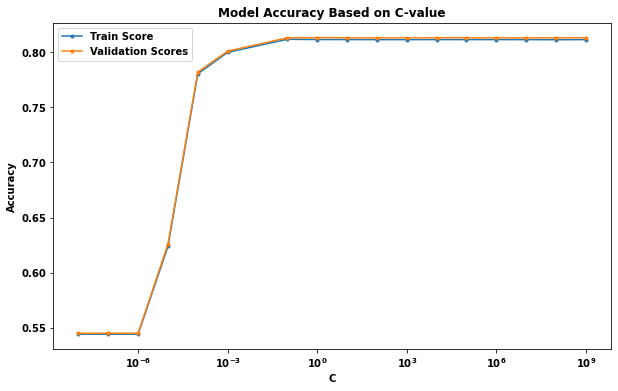

In [28]:
# Initiating a plot
plt.figure(figsize=(10, 6))

# Plotting
plt.plot(C_range, train_scores,label="Train Score",marker='.')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Based on C-value')
plt.legend()

# Showing the plot
plt.show();

Based on the graph, C=0.1 is a good choice. Let's now repeat our steps with the optimized C-value:

In [29]:
# Instanitate base model choosing a random state so that results are reproducible
logreg_scaled = LogisticRegression(random_state=2307, max_iter=10000, C=0.1)

# Fit model 
logreg_scaled.fit(X_train_scaled, y_train)

# Score the model
scores_train_scaled = logreg_scaled.score(X_train_scaled, y_train)
scores_validation_scaled = logreg_scaled.score(X_validation_scaled, y_validation)

# Print the accuracy scores
print("Score on train, logistic model on scaled data:", "{:.2f}".format(scores_train_scaled))
print("Score on validation, logistic model on scaled data:", "{:.2f}".format(scores_validation_scaled))

Score on train, logistic model on scaled data: 0.81
Score on validation, logistic model on scaled data: 0.81


Now let's look at confusion matrix and f1 scores:

In [30]:
# Get class predictions
y_pred = logreg_scaled.predict(X_validation_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_validation, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Suspect Not Identified", "Predicted Suspect Identified"],
    index=["True Suspect Not Identified", "True Suspect Identified"]
)

display(cf_df)

Predicted Suspect Not Identified  \
True Suspect Not Identified                             27758   
True Suspect Identified                                  6808   

                             Predicted Suspect Identified  
True Suspect Not Identified                          7779  
True Suspect Identified                             35748

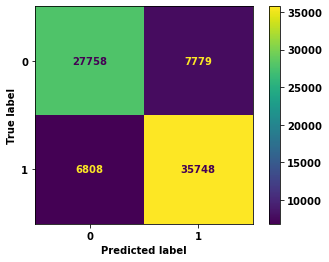

In [31]:
# The function expects the estimator, inputs and target as parameters
plot_confusion_matrix(logreg_scaled, X_validation_scaled, y_validation);

In [32]:
# Calculating the F1 score
f1_score(y_validation, y_pred)

# Printing the report
report_base = classification_report(y_validation, y_pred)
print(report_base)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     35537
           1       0.82      0.84      0.83     42556

    accuracy                           0.81     78093
   macro avg       0.81      0.81      0.81     78093
weighted avg       0.81      0.81      0.81     78093



Let's create a new temporary model score, just for this model:

In [33]:
# Filling in the temporary model score
model_scores_temp = pd.DataFrame({'Name': ["Logistic Model 2"], 'Transformation': ["Scaled data"], 'Optimization': ["C=0.1"], 'Features': ['87'], 'Accuracy on Validation': [scores_validation_scaled*100], 'F1-score on Validation': [f1_score(y_validation, y_pred)*100]})

In [34]:
# Keeping score
model_scores = model_scores.append(model_scores_temp, ignore_index=True)
model_scores

Name Transformation Optimization Features  \
0  Base Logistic Model           None         None       87   
1     Logistic Model 1    Scaled data         None       87   
2     Logistic Model 2    Scaled data        C=0.1       87   

   Accuracy on Validation  F1-score on Validation  
0                   61.45                   69.17  
1                   81.32                   83.06  
2                   81.32                   83.05

Doesn't look like model performance has changed at all with an optimized C-value.

At this point, we can attempt to log transform some columns that resembled a logarithmic function from the EDA. We will only use this if this significantly improves the model accuracy as explainability of data is very important to this project.

<a id='2d'></a>
### 2d) Scaled & Log-transformed Model with Optimized C-value

Now let's log transform the columns we identified during the EDA:

* FSM11to15Proportion 
* FSM5to10Proportion
* WBR Proportion
* WAO Proportion                      
* ABD Proportion                       
* AIN Proportion                       
* APK Proportion                       
* BAF Proportion                       
* BCA Proportion                       
* OXX Proportion                       
* MIX Proportion                       
* AAB Proportion
* Population Density
* Median House Price 

First, let's make a copy of the scaled X_train and X_validation sets. We won't touch the test data until we know that log transformation actually helps

In [35]:
#First, let's take out the names of the columns:

column_names = (df.drop(axis=1, columns="Suspect Identified")).columns
column_names

Index(['Month', 'Longitude', 'Latitude', 'Population', 'Proportion_Males',
       'Proportion_0-15', 'Proportion_16-29', 'Proportion_30-44',
       'Proportion_45-64', 'Proportion_65+', 'Proportion_0car_hhlds',
       '#_ppl_hhld', 'Deprivation_Index', 'Job_Seeker_Allowance_Proportion',
       'FSM11to15Proportion', 'FSM5to10Proportion', 'WBR Proportion',
       'WAO Proportion', 'ABD Proportion', 'AIN Proportion', 'APK Proportion',
       'BAF Proportion', 'BCA Proportion', 'OXX Proportion', 'MIX Proportion',
       'AAB Proportion', 'Area Sq Km', 'Population_Density',
       'Median_House_Price', 'Median_house_price_CAGR_1995-2021', 'Median Age',
       'Proportion of Religious', '('Avon and Somerset Constabulary',)',
       '('Bedfordshire Police',)', '('Cambridgeshire Constabulary',)',
       '('Cheshire Constabulary',)', '('City of London Police',)',
       '('Cleveland Police',)', '('Cumbria Constabulary',)',
       '('Derbyshire Constabulary',)', '('Devon & Cornwall Police',)',


In [36]:
# Making them into dataframes to make column transformations easier
X_train_log = pd.DataFrame(data = X_train_scaled, columns=column_names)
X_validation_log = pd.DataFrame(data = X_validation_scaled, columns=column_names)

In [37]:
X_train_log.head()

Month  Longitude  Latitude  Population  Proportion_Males  Proportion_0-15  \
0   0.00       0.43      0.71        0.08              0.34             0.47   
1   0.18       0.54      0.44        0.10              0.28             0.53   
2   0.00       0.85      0.24        0.09              0.29             0.51   
3   0.36       0.73      0.28        0.09              0.30             0.53   
4   0.82       0.45      0.18        0.10              0.28             0.64   

   Proportion_16-29  Proportion_30-44  Proportion_45-64  Proportion_65+  \
0              0.20              0.40              0.54            0.19   
1              0.17              0.42              0.51            0.20   
2              0.14              0.36              0.55            0.28   
3              0.13              0.46              0.61            0.17   
4              0.17              0.42              0.49            0.14   

   Proportion_0car_hhlds  #_ppl_hhld  Deprivation_Index  \
0                   0.64        0.41               0.14   
1                   0.72        0.26               0.03   
2                   0.35        0.36               0.30   
3                   0.15        0.29               0.75   
4                   0.43        0.33               0.08   

   Job_Seeker_Allowance_Proportion  FSM11to15Proportion  FSM5to10Proportion  \
0                             0.22                 0.24                0.42   
1                             0.46                 0.47                0.58   
2                             0.26                 0.12                0.17   
3                             0.06                 0.09                0.16   
4                             0.25                 0.17                0.12   

   WBR Proportion  WAO Proportion  ABD Proportion  AIN Proportion  \
0            0.94            0.06            0.00            0.01   
1            0.07            0.12            0.19            0.31   
2            0.89            0.03            0.01            0.02   
3            0.63            0.13            0.00            0.15   
4            0.94            0.07            0.00            0.00   

   APK Proportion  BAF Proportion  BCA Proportion  OXX Proportion  \
0            0.00            0.01            0.01            0.01   
1            0.12            0.10            0.61            0.09   
2            0.01            0.06            0.01            0.03   
3            0.02            0.04            0.07            0.05   
4            0.00            0.01            0.00            0.01   

   MIX Proportion  AAB Proportion  Area Sq Km  Population_Density  \
0            0.10            0.02        0.00                0.15   
1            0.36            0.18        0.00                0.12   
2            0.09            0.00        0.00                0.09   
3            0.36            0.10        0.00                0.14   
4            0.08            0.01        0.00                0.12   

   Median_House_Price  Median_house_price_CAGR_1995-2021  Median Age  \
0                0.02                               0.37        0.28   
1                0.02                               0.41        0.27   
2                0.05                               0.48        0.38   
3                0.08                               0.52        0.31   
4                0.03                               0.53        0.22   

   Proportion of Religious  ('Avon and Somerset Constabulary',)  \
0                     0.47                                 0.00   
1                     0.84                                 0.00   
2                     0.50                                 0.00   
3                     0.70                                 0.00   
4                     0.35                                 1.00   

   ('Bedfordshire Police',)  ('Cambridgeshire Constabulary',)  \
0                      0.00                              0.00   
1                      0.00   

We can now start creating new columns in our train and validation sets. We will add a constant (1) because we cannot log transform a zero (and some of our columns have zero values).

In [38]:
# Creating a new columns with log-transformed data
X_train_log['Log_Median_House_Price'] = np.log(X_train_log["Median_House_Price"]+1)
X_validation_log['Log_Median_House_Price'] = np.log(X_validation_log["Median_House_Price"]+1)

In [39]:
# Creating a new columns with log-transformed data
X_train_log['Log_Population_Density'] = np.log(X_train_log["Population_Density"]+1)
X_validation_log['Log_Population_Density'] = np.log(X_validation_log["Population_Density"]+1)

In [40]:
# Creating a new columns with log-transformed data
X_train_log['Log_FSM5to10Proportion'] = np.log(X_train_log["FSM5to10Proportion"]+1)
X_validation_log['Log_FSM5to10Proportion'] = np.log(X_validation_log["FSM5to10Proportion"]+1)

In [41]:
# Creating a new columns with log-transformed data
X_train_log['Log_FSM11to15Proportion'] = np.log(X_train_log["FSM11to15Proportion"]+1)
X_validation_log['Log_FSM11to15Proportion'] = np.log(X_validation_log["FSM11to15Proportion"]+1)

In [42]:
# Creating a new columns with log-transformed data
X_train_log['Log_WBR Proportion'] = np.log(X_train_log["WBR Proportion"]+1)
X_validation_log['Log_WBR Proportion'] = np.log(X_validation_log["WBR Proportion"]+1)

In [43]:
# Creating a new columns with log-transformed data
X_train_log['Log_WAO Proportion'] = np.log(X_train_log["WAO Proportion"]+1)
X_validation_log['Log_WAO Proportion'] = np.log(X_validation_log["WAO Proportion"]+1)

In [44]:
# Creating a new columns with log-transformed data
X_train_log['Log_AIN Proportion'] = np.log(X_train_log["AIN Proportion"]+1)
X_validation_log['Log_AIN Proportion'] = np.log(X_validation_log["AIN Proportion"]+1)

In [45]:
# Creating a new columns with log-transformed data
X_train_log['Log_APK Proportion'] = np.log(X_train_log["APK Proportion"]+1)
X_validation_log['Log_APK Proportion'] = np.log(X_validation_log["APK Proportion"]+1)

In [46]:
# Creating a new columns with log-transformed data
X_train_log['Log_BAF Proportion'] = np.log(X_train_log["BAF Proportion"]+1)
X_validation_log['Log_BAF Proportion'] = np.log(X_validation_log["BAF Proportion"]+1)

In [47]:
# Creating a new columns with log-transformed data
X_train_log['Log_BCA Proportion'] = np.log(X_train_log["BCA Proportion"]+1)
X_validation_log['Log_BCA Proportion'] = np.log(X_validation_log["BCA Proportion"]+1)

In [48]:
# Creating a new columns with log-transformed data
X_train_log['Log_OXX Proportion'] = np.log(X_train_log["OXX Proportion"]+1)
X_validation_log['Log_OXX Proportion'] = np.log(X_validation_log["OXX Proportion"]+1)

In [49]:
# Creating a new columns with log-transformed data
X_train_log['Log_MIX Proportion'] = np.log(X_train_log["MIX Proportion"]+1)
X_validation_log['Log_MIX Proportion'] = np.log(X_validation_log["MIX Proportion"]+1)

In [50]:
# Creating a new columns with log-transformed data
X_train_log['Log_AAB Proportion'] = np.log(X_train_log["AAB Proportion"]+1)
X_validation_log['Log_AAB Proportion'] = np.log(X_validation_log["AAB Proportion"]+1)

In [51]:
# Creating a new columns with log-transformed data
X_train_log['Log_AAB Proportion'] = np.log(X_train_log["AAB Proportion"]+1)
X_validation_log['Log_AAB Proportion'] = np.log(X_validation_log["AAB Proportion"]+1)

Now let's remove the old non-log transformed columns:

In [52]:
# Remove old columns
X_train_log.drop(axis=1, columns=['FSM11to15Proportion', 'FSM5to10Proportion', 'Median_House_Price', 'Population_Density', 'WBR Proportion', 'WAO Proportion', 'ABD Proportion', 'AIN Proportion', 'APK Proportion', 'BAF Proportion', 'BCA Proportion', 'OXX Proportion', 'MIX Proportion', 'AAB Proportion'], inplace=True)
X_validation_log.drop(axis=1, columns=['FSM11to15Proportion', 'FSM5to10Proportion', 'Median_House_Price', 'Population_Density', 'WBR Proportion', 'WAO Proportion', 'ABD Proportion', 'AIN Proportion', 'APK Proportion', 'BAF Proportion', 'BCA Proportion', 'OXX Proportion', 'MIX Proportion', 'AAB Proportion'], inplace=True)

In [53]:
# Checking the log-trasformed dataframe
X_train_log.head()

Month  Longitude  Latitude  Population  Proportion_Males  Proportion_0-15  \
0   0.00       0.43      0.71        0.08              0.34             0.47   
1   0.18       0.54      0.44        0.10              0.28             0.53   
2   0.00       0.85      0.24        0.09              0.29             0.51   
3   0.36       0.73      0.28        0.09              0.30             0.53   
4   0.82       0.45      0.18        0.10              0.28             0.64   

   Proportion_16-29  Proportion_30-44  Proportion_45-64  Proportion_65+  \
0              0.20              0.40              0.54            0.19   
1              0.17              0.42              0.51            0.20   
2              0.14              0.36              0.55            0.28   
3              0.13              0.46              0.61            0.17   
4              0.17              0.42              0.49            0.14   

   Proportion_0car_hhlds  #_ppl_hhld  Deprivation_Index  \
0                   0.64        0.41               0.14   
1                   0.72        0.26               0.03   
2                   0.35        0.36               0.30   
3                   0.15        0.29               0.75   
4                   0.43        0.33               0.08   

   Job_Seeker_Allowance_Proportion  Area Sq Km  \
0                             0.22        0.00   
1                             0.46        0.00   
2                             0.26        0.00   
3                             0.06        0.00   
4                             0.25        0.00   

   Median_house_price_CAGR_1995-2021  Median Age  Proportion of Religious  \
0                               0.37        0.28                     0.47   
1                               0.41        0.27                     0.84   
2                               0.48        0.38                     0.50   
3                               0.52        0.31                     0.70   
4                               0.53        0.22                     0.35   

   ('Avon and Somerset Constabulary',)  ('Bedfordshire Police',)  \
0                                 0.00                      0.00   
1                                 0.00                      0.00   
2                                 0.00                      0.00   
3                                 0.00                      0.00   
4                                 1.00                      0.00   

   ('Cambridgeshire Constabulary',)  ('Cheshire Constabulary',)  \
0                              0.00                        0.00   
1                              0.00                        0.00   
2                              0.00                        0.00   
3                              0.00                        0.00   
4                              0.00                        0.00   

   ('City of London Police',)  ('Cleveland Police',)  \
0                        0.00                   0.00   
1                        0.00                   0.00   
2                        0.00                   0.00   
3                        0.00                   0.00   
4                        0.00                   0.00   

   ('Cumbria Constabulary',)  ('Derbyshire Constabulary',)  \
0                       0.00                          0.00   
1                       0.00                          0.00   
2                       0.00                          0.00   
3                       0.00                          0.00   
4                       0.00                          0.00   

   ('Devon & Cornwall Police',)  ('Dorset Police',)  ('Durham Constabulary',)  \
0                          0.00                0.00                      0.00   
1                          0.00                0.00                      0.00   
2                          0.00                0.00                      0.00   
3                          0.00                0.00                      0.00   
4                        

Now let's fit the model:

In [54]:
# Instanitate base model choosing a random state so that results are reproducible
logreg_log = LogisticRegression(random_state=2307, max_iter=10000, C=0.1)

# Fit model 
logreg_log.fit(X_train_log, y_train)

# Score the model
scores_train_log = logreg_log.score(X_train_log, y_train)
scores_validation_log = logreg_log.score(X_validation_log, y_validation)

# Print the accuracy scores
print("Score on train, logistic model on scaled & log-transformed data:", "{:.2f}".format(scores_train_log))
print("Score on validation, logistic model on scaled & log-transformed data:", "{:.2f}".format(scores_validation_log))

Score on train, logistic model on scaled & log-transformed data: 0.81
Score on validation, logistic model on scaled & log-transformed data: 0.81


Now let's create the confusion matrix:

In [55]:
# Get class predictions
y_pred = logreg_log.predict(X_validation_log)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_validation, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Suspect Not Identified", "Predicted Suspect Identified"],
    index=["True Suspect Not Identified", "True Suspect Identified"]
)

display(cf_df)

Predicted Suspect Not Identified  \
True Suspect Not Identified                             27755   
True Suspect Identified                                  6803   

                             Predicted Suspect Identified  
True Suspect Not Identified                          7782  
True Suspect Identified                             35753

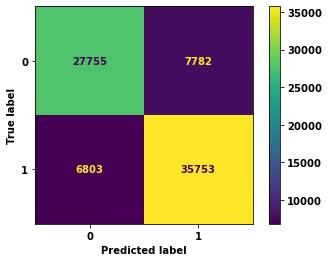

In [56]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(logreg_log, X_validation_log, y_validation);

In [57]:
# Let's look at the report
report = classification_report(y_validation, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     35537
           1       0.82      0.84      0.83     42556

    accuracy                           0.81     78093
   macro avg       0.81      0.81      0.81     78093
weighted avg       0.81      0.81      0.81     78093



In [58]:
# Filling in the temporary model score
model_scores_temp = pd.DataFrame({'Name': ["Logistic Model 3"], 'Transformation': ["Scaled & log-transformed data"], 'Optimization': ["C=0.1"], 'Features': ['87'], 'Accuracy on Validation': [scores_validation_log*100], 'F1-score on Validation': [f1_score(y_validation, y_pred)*100]})

In [59]:
# Keeping score
model_scores = model_scores.append(model_scores_temp, ignore_index=True)
model_scores

Name                 Transformation Optimization Features  \
0  Base Logistic Model                           None         None       87   
1     Logistic Model 1                    Scaled data         None       87   
2     Logistic Model 2                    Scaled data        C=0.1       87   
3     Logistic Model 3  Scaled & log-transformed data        C=0.1       87   

   Accuracy on Validation  F1-score on Validation  
0                   61.45                   69.17  
1                   81.32                   83.06  
2                   81.32                   83.05  
3                   81.32                   83.06

As we can see, log-transforming the columns doesn't help with model accuracy or F1-score so we will continue working with scaled data.

<a id='2e'></a>
### 2e) Scaled Model with Feature Selection (Threshold Variance)

We do get some decent scores but we have 87 features which is a lot. We would also like to deal with multicollinearity in our data.

First, let's start by initiating the Variance Thresholder to find out the features that have enough variance in our data:

In [60]:
# Instantiate the VarianceThresholder, we need to set a threshold variance
my_vt = VarianceThreshold(threshold=0.0004)

# Fit to the data and calculate the variances per column
my_vt.fit(X_train_scaled)

VarianceThreshold(threshold=0.0004)

In [61]:
# Now let's make X_train and X_validation into dataframes
X_train_featsel = pd.DataFrame(data = X_train_scaled, columns=column_names)
X_validation_featsel = pd.DataFrame(data = X_validation_scaled, columns=column_names)

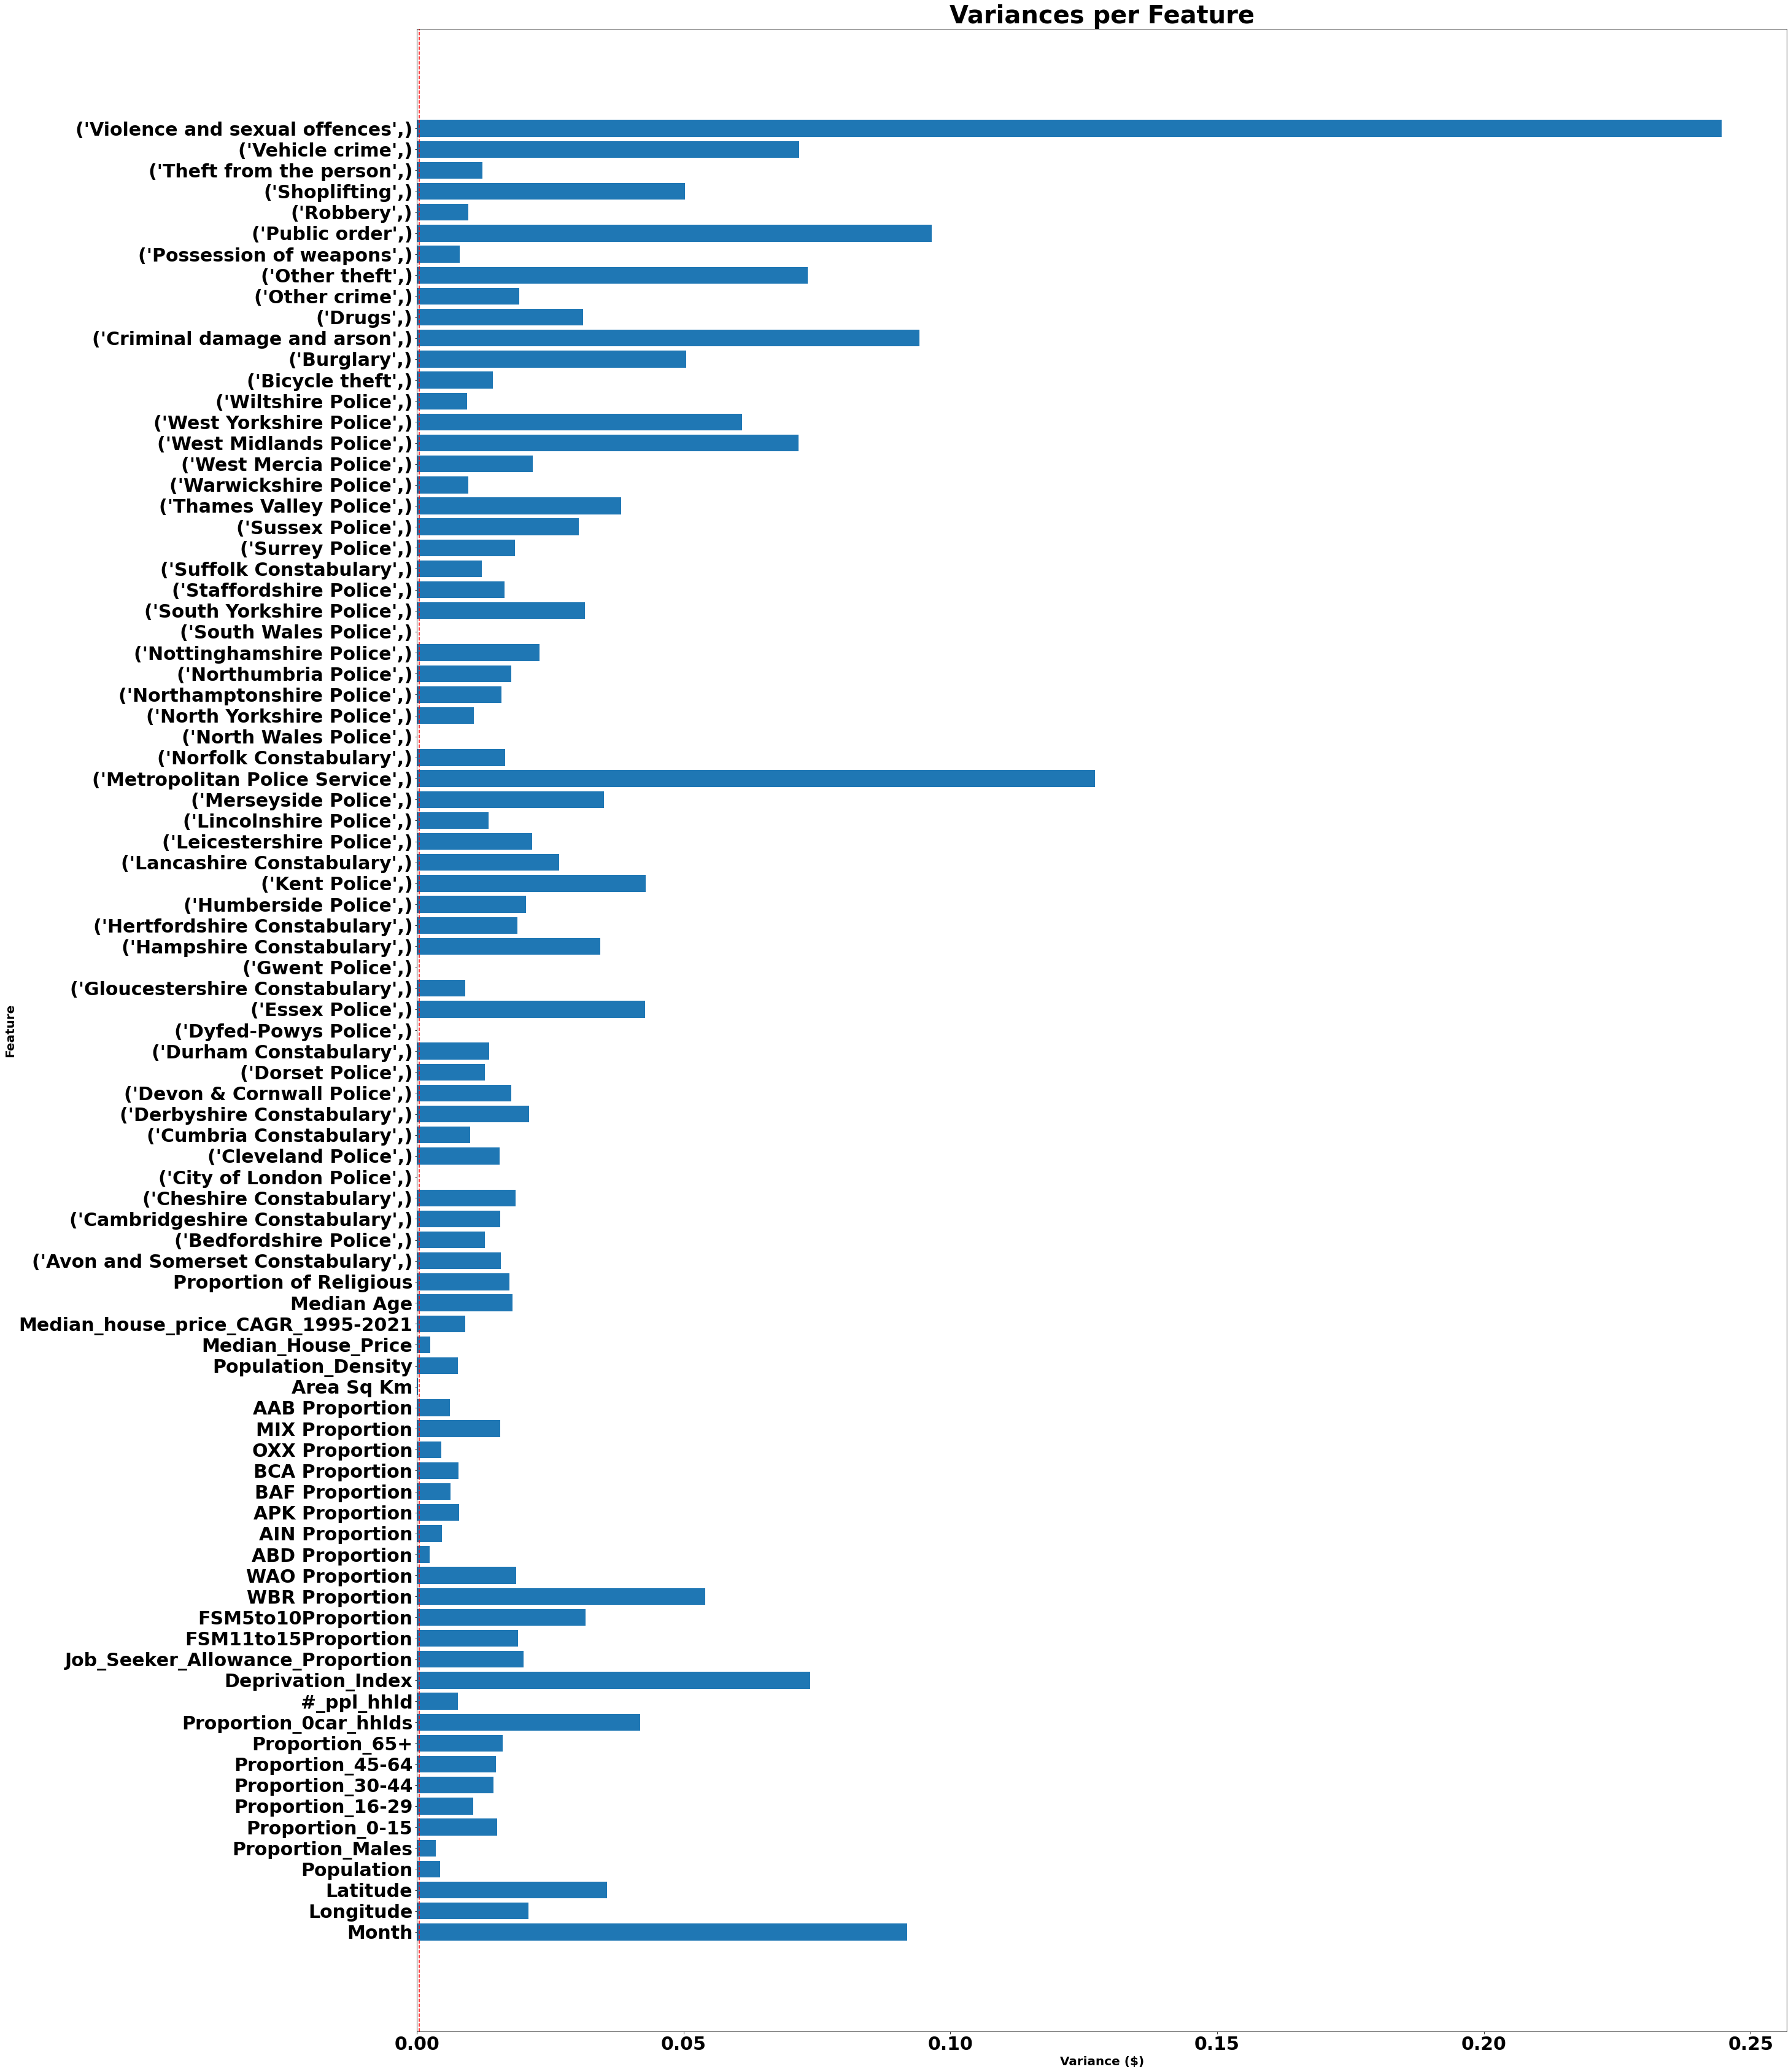

In [62]:
# Extract the variances per column
column_variances = my_vt.variances_

# Plot with the threshold
plt.figure(figsize=(40,60))
plt.barh(X_train_featsel.columns, column_variances)
plt.xlabel('Variance ($)', fontsize=20)
plt.ylabel('Feature', fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.axvline(0.0004, color='red', linestyle='--')
plt.title('Variances per Feature', fontsize=40)

# Show the plot
plt.show()

Majority of our columns seem to have good variance. Let's check if there are any we can drop at this stage due to low variance:

In [63]:
# Get the columns which are retained
my_vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [64]:
# Apply the variance threshold to drop columns below the given variance
pd.DataFrame(my_vt.transform(X_train_featsel), columns = X_train_featsel.columns[my_vt.get_support()]).head()

Month  Longitude  Latitude  Population  Proportion_Males  Proportion_0-15  \
0   0.00       0.43      0.71        0.08              0.34             0.47   
1   0.18       0.54      0.44        0.10              0.28             0.53   
2   0.00       0.85      0.24        0.09              0.29             0.51   
3   0.36       0.73      0.28        0.09              0.30             0.53   
4   0.82       0.45      0.18        0.10              0.28             0.64   

   Proportion_16-29  Proportion_30-44  Proportion_45-64  Proportion_65+  \
0              0.20              0.40              0.54            0.19   
1              0.17              0.42              0.51            0.20   
2              0.14              0.36              0.55            0.28   
3              0.13              0.46              0.61            0.17   
4              0.17              0.42              0.49            0.14   

   Proportion_0car_hhlds  #_ppl_hhld  Deprivation_Index  \
0                   0.64        0.41               0.14   
1                   0.72        0.26               0.03   
2                   0.35        0.36               0.30   
3                   0.15        0.29               0.75   
4                   0.43        0.33               0.08   

   Job_Seeker_Allowance_Proportion  FSM11to15Proportion  FSM5to10Proportion  \
0                             0.22                 0.24                0.42   
1                             0.46                 0.47                0.58   
2                             0.26                 0.12                0.17   
3                             0.06                 0.09                0.16   
4                             0.25                 0.17                0.12   

   WBR Proportion  WAO Proportion  ABD Proportion  AIN Proportion  \
0            0.94            0.06            0.00            0.01   
1            0.07            0.12            0.19            0.31   
2            0.89            0.03            0.01            0.02   
3            0.63            0.13            0.00            0.15   
4            0.94            0.07            0.00            0.00   

   APK Proportion  BAF Proportion  BCA Proportion  OXX Proportion  \
0            0.00            0.01            0.01            0.01   
1            0.12            0.10            0.61            0.09   
2            0.01            0.06            0.01            0.03   
3            0.02            0.04            0.07            0.05   
4            0.00            0.01            0.00            0.01   

   MIX Proportion  AAB Proportion  Population_Density  Median_House_Price  \
0            0.10            0.02                0.15                0.02   
1            0.36            0.18                0.12                0.02   
2            0.09            0.00                0.09                0.05   
3            0.36            0.10                0.14                0.08   
4            0.08            0.01                0.12                0.03   

   Median_house_price_CAGR_1995-2021  Median Age  Proportion of Religious  \
0                               0.37        0.28                     0.47   
1                               0.41        0.27                     0.84   
2                               0.48        0.38                     0.50   
3                               0.52        0.31                     0.70   
4                               0.53        0.22                     0.35   

   ('Avon and Somerset Constabulary',)  ('Bedfordshire Police',)  \
0                                 0.00                      0.00   
1                                 0.00                      0.00   
2                                 0.00                      0.00   
3                                 0.00                      0.00   
4                                 1.00                      0.00   

   ('Cambridgeshire Constabulary',)  ('Cheshire Constabulary',)  \
0        

In [65]:
# We can still apply this to the original dataframe if we wanted to continue to use the original values
X_train_featsel = pd.DataFrame(my_vt.transform(X_train_featsel), columns = X_train_featsel.columns[my_vt.get_support()])

In [66]:
# Let's take a look
X_train_featsel.shape

(182214, 81)

Now let's apply this to the validation set:

In [67]:
# We can still apply this to the original dataframe if we wanted to continue to use the original values
X_validation_featsel = pd.DataFrame(my_vt.transform(X_validation_featsel), columns = X_validation_featsel.columns[my_vt.get_support()])

In [68]:
X_validation_featsel.shape

(78093, 81)

Variance Thresholder reduced our number of features by 7. Now we can throw in the remaining features group by group in order to select the best ones and deal with multicollinearity.

In [69]:
# Instanitate model choosing a random state so that results are reproducible
logreg_featsel = LogisticRegression(random_state=2307, max_iter=10000, C=0.1)

# Fit model 
logreg_featsel.fit(X_train_featsel, y_train)

# Score the model
scores_train = logreg_featsel.score(X_train_featsel, y_train)
scores_validation = logreg_featsel.score(X_validation_featsel, y_validation)

# Print the accuracy scores
print("Score on train, logistic model on Thresholded data:", "{:.2f}".format(scores_train))
print("Score on validation, logistic model on Thresholded data:", "{:.2f}".format(scores_validation))

Score on train, logistic model on Thresholded data: 0.81
Score on validation, logistic model on Thresholded data: 0.81


Now let's create the confusion matrix:

In [70]:
# Get class predictions
y_pred = logreg_featsel.predict(X_validation_featsel)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_validation, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Suspect Not Identified", "Predicted Suspect Identified"],
    index=["True Suspect Not Identified", "True Suspect Identified"]
)

display(cf_df)

Predicted Suspect Not Identified  \
True Suspect Not Identified                             27767   
True Suspect Identified                                  6809   

                             Predicted Suspect Identified  
True Suspect Not Identified                          7770  
True Suspect Identified                             35747

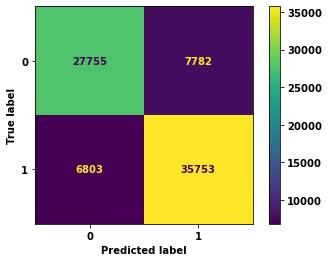

In [71]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(logreg_log, X_validation_log, y_validation);

In [72]:
# Let's look at the report
report = classification_report(y_validation, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     35537
           1       0.82      0.84      0.83     42556

    accuracy                           0.81     78093
   macro avg       0.81      0.81      0.81     78093
weighted avg       0.81      0.81      0.81     78093



In [73]:
# Filling in the temporary model score
model_scores_temp = pd.DataFrame({'Name': ["Logistic Model 4"], 'Transformation': ["Scaled data"], 'Optimization': ["C=0.1"], 'Features': ['81 (VT)'], 'Accuracy on Validation': [scores_validation*100], 'F1-score on Validation': [f1_score(y_validation, y_pred)*100]})

In [74]:
# Keeping score
model_scores = model_scores.append(model_scores_temp, ignore_index=True)
model_scores

Name                 Transformation Optimization Features  \
0  Base Logistic Model                           None         None       87   
1     Logistic Model 1                    Scaled data         None       87   
2     Logistic Model 2                    Scaled data        C=0.1       87   
3     Logistic Model 3  Scaled & log-transformed data        C=0.1       87   
4     Logistic Model 4                    Scaled data        C=0.1  81 (VT)   

   Accuracy on Validation  F1-score on Validation  
0                   61.45                   69.17  
1                   81.32                   83.06  
2                   81.32                   83.05  
3                   81.32                   83.06  
4                   81.33                   83.06

We're getting the same results with a small number of features. Let's see if we can reduce the number of feature further:

<a id='2f'></a>
### 2f) Scaled Model with Feature Selection (Threshold Variance & p-values)

Let's look at our data with reduced columns:

In [75]:
# Looking at our data
X_train_featsel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182214 entries, 0 to 182213
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Month                                182214 non-null  float64
 1   Longitude                            182214 non-null  float64
 2   Latitude                             182214 non-null  float64
 3   Population                           182214 non-null  float64
 4   Proportion_Males                     182214 non-null  float64
 5   Proportion_0-15                      182214 non-null  float64
 6   Proportion_16-29                     182214 non-null  float64
 7   Proportion_30-44                     182214 non-null  float64
 8   Proportion_45-64                     182214 non-null  float64
 9   Proportion_65+                       182214 non-null  float64
 10  Proportion_0car_hhlds                182214 non-null  float64
 11  #_ppl_hhld   

Let's look at the coefficients, odds ratios and p-values:

In [76]:
scores, pvalues_array = chi2(X_validation_featsel, y_validation)

# Assigning coefficients to a list
coef_table = logreg_featsel.coef_

# Creating a PD dataframe with the coefficients
coef_table = pd.DataFrame(list(X_validation_featsel.columns)).copy()
coef_table.insert(len(coef_table.columns), "Coefficients", logreg_featsel.coef_.transpose())

# Renaming the first column to Features
coef_table.rename(columns = {0:'Features'}, inplace = True)

# Creating a dataframe
pvalues = pd.DataFrame(data=pvalues_array)

# Adding odds ratios
coef_table.insert(len(coef_table.columns), "Odds Ratios", np.exp(logreg_featsel.coef_.transpose()))

# Adding p-values
coef_table.insert(len(coef_table.columns), "P-values", pvalues)

# Looking at the result
coef_table

Features  Coefficients  Odds Ratios  P-values
0                               Month         -0.13         0.88      0.06
1                           Longitude         -0.16         0.85      0.00
2                            Latitude         -0.22         0.80      0.00
3                          Population          0.01         1.01      0.02
4                    Proportion_Males          0.20         1.22      0.20
..                                ...           ...          ...       ...
76                       ('Robbery',)          0.03         1.03      0.00
77                   ('Shoplifting',)         -0.51         0.60      0.00
78         ('Theft from the person',)         -0.99         0.37      0.00
79                 ('Vehicle crime',)         -2.15         0.12      0.00
80  ('Violence and sexual offences',)          1.45         4.27      0.00

[81 rows x 4 columns]

We can already see that some features have too high p-values. Let's filter them out:

In [77]:
# Only leaving the features that have p<0.005
coef_table = coef_table.loc[coef_table['P-values'] < 0.05]
coef_table

Features  Coefficients  Odds Ratios  P-values
1                           Longitude         -0.16         0.85      0.00
2                            Latitude         -0.22         0.80      0.00
3                          Population          0.01         1.01      0.02
6                    Proportion_16-29         -0.20         0.82      0.03
7                    Proportion_30-44          0.07         1.08      0.00
..                                ...           ...          ...       ...
76                       ('Robbery',)          0.03         1.03      0.00
77                   ('Shoplifting',)         -0.51         0.60      0.00
78         ('Theft from the person',)         -0.99         0.37      0.00
79                 ('Vehicle crime',)         -2.15         0.12      0.00
80  ('Violence and sexual offences',)          1.45         4.27      0.00

[76 rows x 4 columns]

This got rid of 5 features. Now we can filter out the features whose odds ratios do not have a big impact on the dependent variable. We define it as Odds Ratios between 0.85 and 1.15.

In [78]:
# Only leaving most important variables
coef_table = coef_table.loc[(coef_table['Odds Ratios'] > 1.15) | (coef_table['Odds Ratios'] < 0.85)]
coef_table

Features  Coefficients  Odds Ratios  P-values
2                              Latitude         -0.22         0.80      0.00
6                      Proportion_16-29         -0.20         0.82      0.03
8                      Proportion_45-64          0.19         1.21      0.03
11                           #_ppl_hhld         -0.25         0.78      0.04
12                    Deprivation_Index         -0.31         0.73      0.00
14                  FSM11to15Proportion          0.24         1.27      0.00
16                       WBR Proportion          0.32         1.38      0.00
21                       BAF Proportion         -0.46         0.63      0.00
22                       BCA Proportion          0.16         1.17      0.00
23                       OXX Proportion         -0.46         0.63      0.00
25                       AAB Proportion          0.17         1.18      0.00
26                   Population_Density          0.45         1.56      0.00
27                   Median_House_Price         -0.75         0.47      0.00
31  ('Avon and Somerset Constabulary',)          3.10        22.10      0.00
35                ('Cleveland Police',)          0.23         1.26      0.00
36            ('Cumbria Constabulary',)          0.49         1.63      0.00
37         ('Derbyshire Constabulary',)          0.20         1.22      0.00
39                   ('Dorset Police',)          0.16         1.17      0.00
40             ('Durham Constabulary',)          0.23         1.26      0.00
42    ('Gloucestershire Constabulary',)          0.35         1.41      0.00
43          ('Hampshire Constabulary',)         -0.37         0.69      0.00
44      ('Hertfordshire Constabulary',)          0.24         1.27      0.00
45               ('Humberside Police',)          0.27         1.31      0.00
46                     ('Kent Police',)          0.18         1.20      0.00
47         ('Lancashire Constabulary',)          0.26         1.30      0.00
50               ('Merseyside Police',)         -0.20         0.82      0.00
51     ('Metropolitan Police Service',)         -3.12         0.04      0.00
52            ('Norfolk Constabulary',)          0.73         2.07      0.00
53          ('North Yorkshire Police',)          0.53         1.71      0.00
55              ('Northumbria Police',)         -2.74         0.06      0.00
59            ('Suffolk Constabulary',)          0.47         1.60      0.00
61                   ('Sussex Police',)         -0.54         0.58      0.00
63             ('Warwickshire Police',)          0.37         1.45      0.00
64              ('West Mercia Police',)          0.40         1.49      0.00
65            ('West Midlands Police',)         -0.65         0.52      0.01
68                   ('Bicycle theft',)         -2.18         0.11      0.00
69                        ('Burglary',)         -1.65         0.19      0.00
70       ('Criminal damage and arson',)         -0.73         0.48      0.00
71                           ('Drugs',)          4.27        71.25      0.00
72                     ('Other crime',)          1.30         3.66      0.00
73                     ('Other theft',)         -1.23         0.29      0.00
74           ('Possession of weapons',)          1.88         6.59      0.00
75                    ('Public order',)          0.57         1.76      0.00
77                     ('Shoplifting',)         -0.51         0.60      0.00
78           ('Theft from the person',)         -0.99         0.37      0.00
79                   ('Vehicle crime',)         -2.15         0.12      0.00
80    ('Violence and sexual offences',)          1.45         4.27      0.00

Now let's save our features list:

In [79]:
features_list = coef_table['Features'].reset_index(drop=True)
features_list

0                                Latitude
1                        Proportion_16-29
2                        Proportion_45-64
3                              #_ppl_hhld
4                       Deprivation_Index
5                     FSM11to15Proportion
6                          WBR Proportion
7                          BAF Proportion
8                          BCA Proportion
9                          OXX Proportion
10                         AAB Proportion
11                     Population_Density
12                     Median_House_Price
13    ('Avon and Somerset Constabulary',)
14                  ('Cleveland Police',)
15              ('Cumbria Constabulary',)
16           ('Derbyshire Constabulary',)
17                     ('Dorset Police',)
18               ('Durham Constabulary',)
19      ('Gloucestershire Constabulary',)
20            ('Hampshire Constabulary',)
21        ('Hertfordshire Constabulary',)
22                 ('Humberside Police',)
23                       ('Kent Po

Let's create a new df with these features so we can check correlations:

In [80]:
# Making an array
np.array(features_list)

array(['Latitude', 'Proportion_16-29', 'Proportion_45-64', '#_ppl_hhld',
       'Deprivation_Index', 'FSM11to15Proportion', 'WBR Proportion',
       'BAF Proportion', 'BCA Proportion', 'OXX Proportion',
       'AAB Proportion', 'Population_Density', 'Median_House_Price',
       "('Avon and Somerset Constabulary',)", "('Cleveland Police',)",
       "('Cumbria Constabulary',)", "('Derbyshire Constabulary',)",
       "('Dorset Police',)", "('Durham Constabulary',)",
       "('Gloucestershire Constabulary',)", "('Hampshire Constabulary',)",
       "('Hertfordshire Constabulary',)", "('Humberside Police',)",
       "('Kent Police',)", "('Lancashire Constabulary',)",
       "('Merseyside Police',)", "('Metropolitan Police Service',)",
       "('Norfolk Constabulary',)", "('North Yorkshire Police',)",
       "('Northumbria Police',)", "('Suffolk Constabulary',)",
       "('Sussex Police',)", "('Warwickshire Police',)",
       "('West Mercia Police',)", "('West Midlands Police',)",
       "('B

Let's create a small function that helps us keep the columns in a DataFrame rather than deleting it:

In [81]:
# Keeping columns
def keep_cols(DataFrame, keep_these):
    """Keep only the columns [keep_these] in a DataFrame, delete
    all other columns. 
    """
    drop_these = list(set(list(DataFrame)) - set(keep_these))
    return DataFrame.drop(drop_these, axis = 1)

In [82]:
X_train_featsel1 = X_train_featsel.pipe(keep_cols, np.array(features_list))
X_train_featsel1.head()

Latitude  Proportion_16-29  Proportion_45-64  #_ppl_hhld  \
0      0.71              0.20              0.54        0.41   
1      0.44              0.17              0.51        0.26   
2      0.24              0.14              0.55        0.36   
3      0.28              0.13              0.61        0.29   
4      0.18              0.17              0.49        0.33   

   Deprivation_Index  FSM11to15Proportion  WBR Proportion  BAF Proportion  \
0               0.14                 0.24            0.94            0.01   
1               0.03                 0.47            0.07            0.10   
2               0.30                 0.12            0.89            0.06   
3               0.75                 0.09            0.63            0.04   
4               0.08                 0.17            0.94            0.01   

   BCA Proportion  OXX Proportion  AAB Proportion  Population_Density  \
0            0.01            0.01            0.02                0.15   
1            0.61            0.09            0.18                0.12   
2            0.01            0.03            0.00                0.09   
3            0.07            0.05            0.10                0.14   
4            0.00            0.01            0.01                0.12   

   Median_House_Price  ('Avon and Somerset Constabulary',)  \
0                0.02                                 0.00   
1                0.02                                 0.00   
2                0.05                                 0.00   
3                0.08                                 0.00   
4                0.03                                 1.00   

   ('Cleveland Police',)  ('Cumbria Constabulary',)  \
0                   0.00                       0.00   
1                   0.00                       0.00   
2                   0.00                       0.00   
3                   0.00                       0.00   
4                   0.00                       0.00   

   ('Derbyshire Constabulary',)  ('Dorset Police',)  ('Durham Constabulary',)  \
0                          0.00                0.00                      0.00   
1                          0.00                0.00                      0.00   
2                          0.00                0.00                      0.00   
3                          0.00                0.00                      0.00   
4                          0.00                0.00                      0.00   

   ('Gloucestershire Constabulary',)  ('Hampshire Constabulary',)  \
0                               0.00                         0.00   
1                               0.00                         0.00   
2                               0.00                         0.00   
3                               0.00                         0.00   
4                               0.00                         0.00   

   ('Hertfordshire Constabulary',)  ('Humberside Police',)  ('Kent Police',)  \
0                             0.00                    0.00              0.00   
1                             0.00                    0.00              0.00   
2                             0.00                    0.00              1.00   
3                             0.00                    0.00              0.00   
4                             0.00                    0.00              0.00   

   ('Lancashire Constabulary',)  ('Merseyside Police',)  \
0                          1.00                    0.00   
1                          0.00                    0.00   
2                          0.00                    0.00   
3                          0.00                    0.00   
4                          0.00                    0.00   

   ('Metropolitan Police Service',)  ('Norfolk Constabulary',)  \
0                              0.00                       0.00   
1                              0.00                       0.00   
2                              0.00                       0.00   
3               

In [83]:
X_validation_featsel1 = X_validation_featsel.pipe(keep_cols, np.array(features_list))
X_validation_featsel1.head()

Latitude  Proportion_16-29  Proportion_45-64  #_ppl_hhld  \
0      0.42              0.14              0.54        0.23   
1      0.16              0.12              0.71        0.36   
2      0.18              0.08              0.70        0.35   
3      0.27              0.27              0.50        0.26   
4      0.26              0.10              0.68        0.23   

   Deprivation_Index  FSM11to15Proportion  WBR Proportion  BAF Proportion  \
0               0.83                 0.08            0.84            0.03   
1               0.72                 0.01            0.93            0.03   
2               0.90                 0.01            0.92            0.01   
3               0.30                 0.40            0.35            0.10   
4               0.79                 0.05            0.89            0.03   

   BCA Proportion  OXX Proportion  AAB Proportion  Population_Density  \
0            0.02            0.02            0.03                0.08   
1            0.00            0.01            0.02                0.12   
2            0.00            0.02            0.02                0.07   
3            0.04            0.17            0.34                0.29   
4            0.03            0.01            0.01                0.00   

   Median_House_Price  ('Avon and Somerset Constabulary',)  \
0                0.06                                 0.00   
1                0.06                                 0.00   
2                0.07                                 0.00   
3                0.22                                 0.00   
4                0.09                                 0.00   

   ('Cleveland Police',)  ('Cumbria Constabulary',)  \
0                   0.00                       0.00   
1                   0.00                       0.00   
2                   0.00                       0.00   
3                   0.00                       0.00   
4                   0.00                       0.00   

   ('Derbyshire Constabulary',)  ('Dorset Police',)  ('Durham Constabulary',)  \
0                          0.00                0.00                      0.00   
1                          0.00                0.00                      0.00   
2                          0.00                0.00                      0.00   
3                          0.00                0.00                      0.00   
4                          0.00                0.00                      0.00   

   ('Gloucestershire Constabulary',)  ('Hampshire Constabulary',)  \
0                               0.00                         0.00   
1                               0.00                         0.00   
2                               0.00                         1.00   
3                               0.00                         0.00   
4                               0.00                         0.00   

   ('Hertfordshire Constabulary',)  ('Humberside Police',)  ('Kent Police',)  \
0                             0.00                    0.00              0.00   
1                             0.00                    0.00              0.00   
2                             0.00                    0.00              0.00   
3                             0.00                    0.00              0.00   
4                             0.00                    0.00              0.00   

   ('Lancashire Constabulary',)  ('Merseyside Police',)  \
0                          0.00                    0.00   
1                          0.00                    0.00   
2                          0.00                    0.00   
3                          0.00                    0.00   
4                          0.00                    0.00   

   ('Metropolitan Police Service',)  ('Norfolk Constabulary',)  \
0                              0.00                       0.00   
1                              0.00                       0.00   
2                              0.00                       0.00   
3               

Now let's look at correlations to see if there's anything to worry about:

In [84]:
# Lets get the correlation matrix and save to variable 'corr_mat'
corr_mat = X_train_featsel1.corr()

# Display corr_mat
corr_mat

Latitude  Proportion_16-29  \
Latitude                                 1.00              0.01   
Proportion_16-29                         0.01              1.00   
Proportion_45-64                         0.07             -0.74   
#_ppl_hhld                               0.17             -0.39   
Deprivation_Index                       -0.21             -0.24   
FSM11to15Proportion                      0.11              0.31   
WBR Proportion                           0.24             -0.32   
BAF Proportion                          -0.25              0.20   
BCA Proportion                          -0.19              0.11   
OXX Proportion                          -0.22              0.27   
AAB Proportion                          -0.25              0.41   
Population_Density                      -0.19              0.35   
Median_House_Price                      -0.45             -0.05   
('Avon and Somerset Constabulary',)     -0.12              0.02   
('Cleveland Police',)                    0.25              0.02   
('Cumbria Constabulary',)                0.20             -0.03   
('Derbyshire Constabulary',)             0.09              0.01   
('Dorset Police',)                      -0.17             -0.00   
('Durham Constabulary',)                 0.25             -0.03   
('Gloucestershire Constabulary',)       -0.05             -0.01   
('Hampshire Constabulary',)             -0.25              0.02   
('Hertfordshire Constabulary',)         -0.08             -0.04   
('Humberside Police',)                   0.17             -0.01   
('Kent Police',)                        -0.21             -0.03   
('Lancashire Constabulary',)             0.21             -0.01   
('Merseyside Police',)                   0.18              0.01   
('Metropolitan Police Service',)        -0.33              0.05   
('Norfolk Constabulary',)                0.03             -0.02   
('North Yorkshire Police',)              0.16             -0.01   
('Northumbria Police',)                  0.32              0.03   
('Suffolk Constabulary',)               -0.02             -0.04   
('Sussex Police',)                      -0.24              0.01   
('Warwickshire Police',)                -0.00             -0.01   
('West Mercia Police',)                  0.00             -0.04   
('West Midlands Police',)                0.03              0.07   
('Bicycle theft',)                      -0.03              0.07   
('Burglary',)                            0.00             -0.01   
('Criminal damage and arson',)           0.03             -0.02   
('Drugs',)                              -0.03              0.02   
('Other crime',)                         0.02             -0.01   
('Other theft',)                        -0.03              0.01   
('Possession of weapons',)              -0.00              0.01   
('Public order',)                        0.03              0.00   
('Shoplifting',)                         0.01              0.03   
('Theft from the person',)              -0.05              0.05   
('Vehicle crime',)                      -0.06             -0.03   
('Violence and sexual offences',)        0.03             -0.03   

                                     Proportion_45-64  #_ppl_hhld  \
Latitude                                         0.07        0.17   
Proportion_16-29                                -0.74       -0.39   
Proportion_45-64                                 1.00        0.49   
#_ppl_hhld                                       0.49        1.00   
Deprivation_Index                                0.36       -0.02   
FSM11to15Proportion                             -0.46       -0.11   
WBR Proportion                                   0.50        0.40   
BAF Proportion                                  -0.34       -0.28   
BCA Proportion                                  -0.23       -0.19   
OXX Proportion                                  -0.38       -0.26   
AAB Proportion                                  -0.42       -

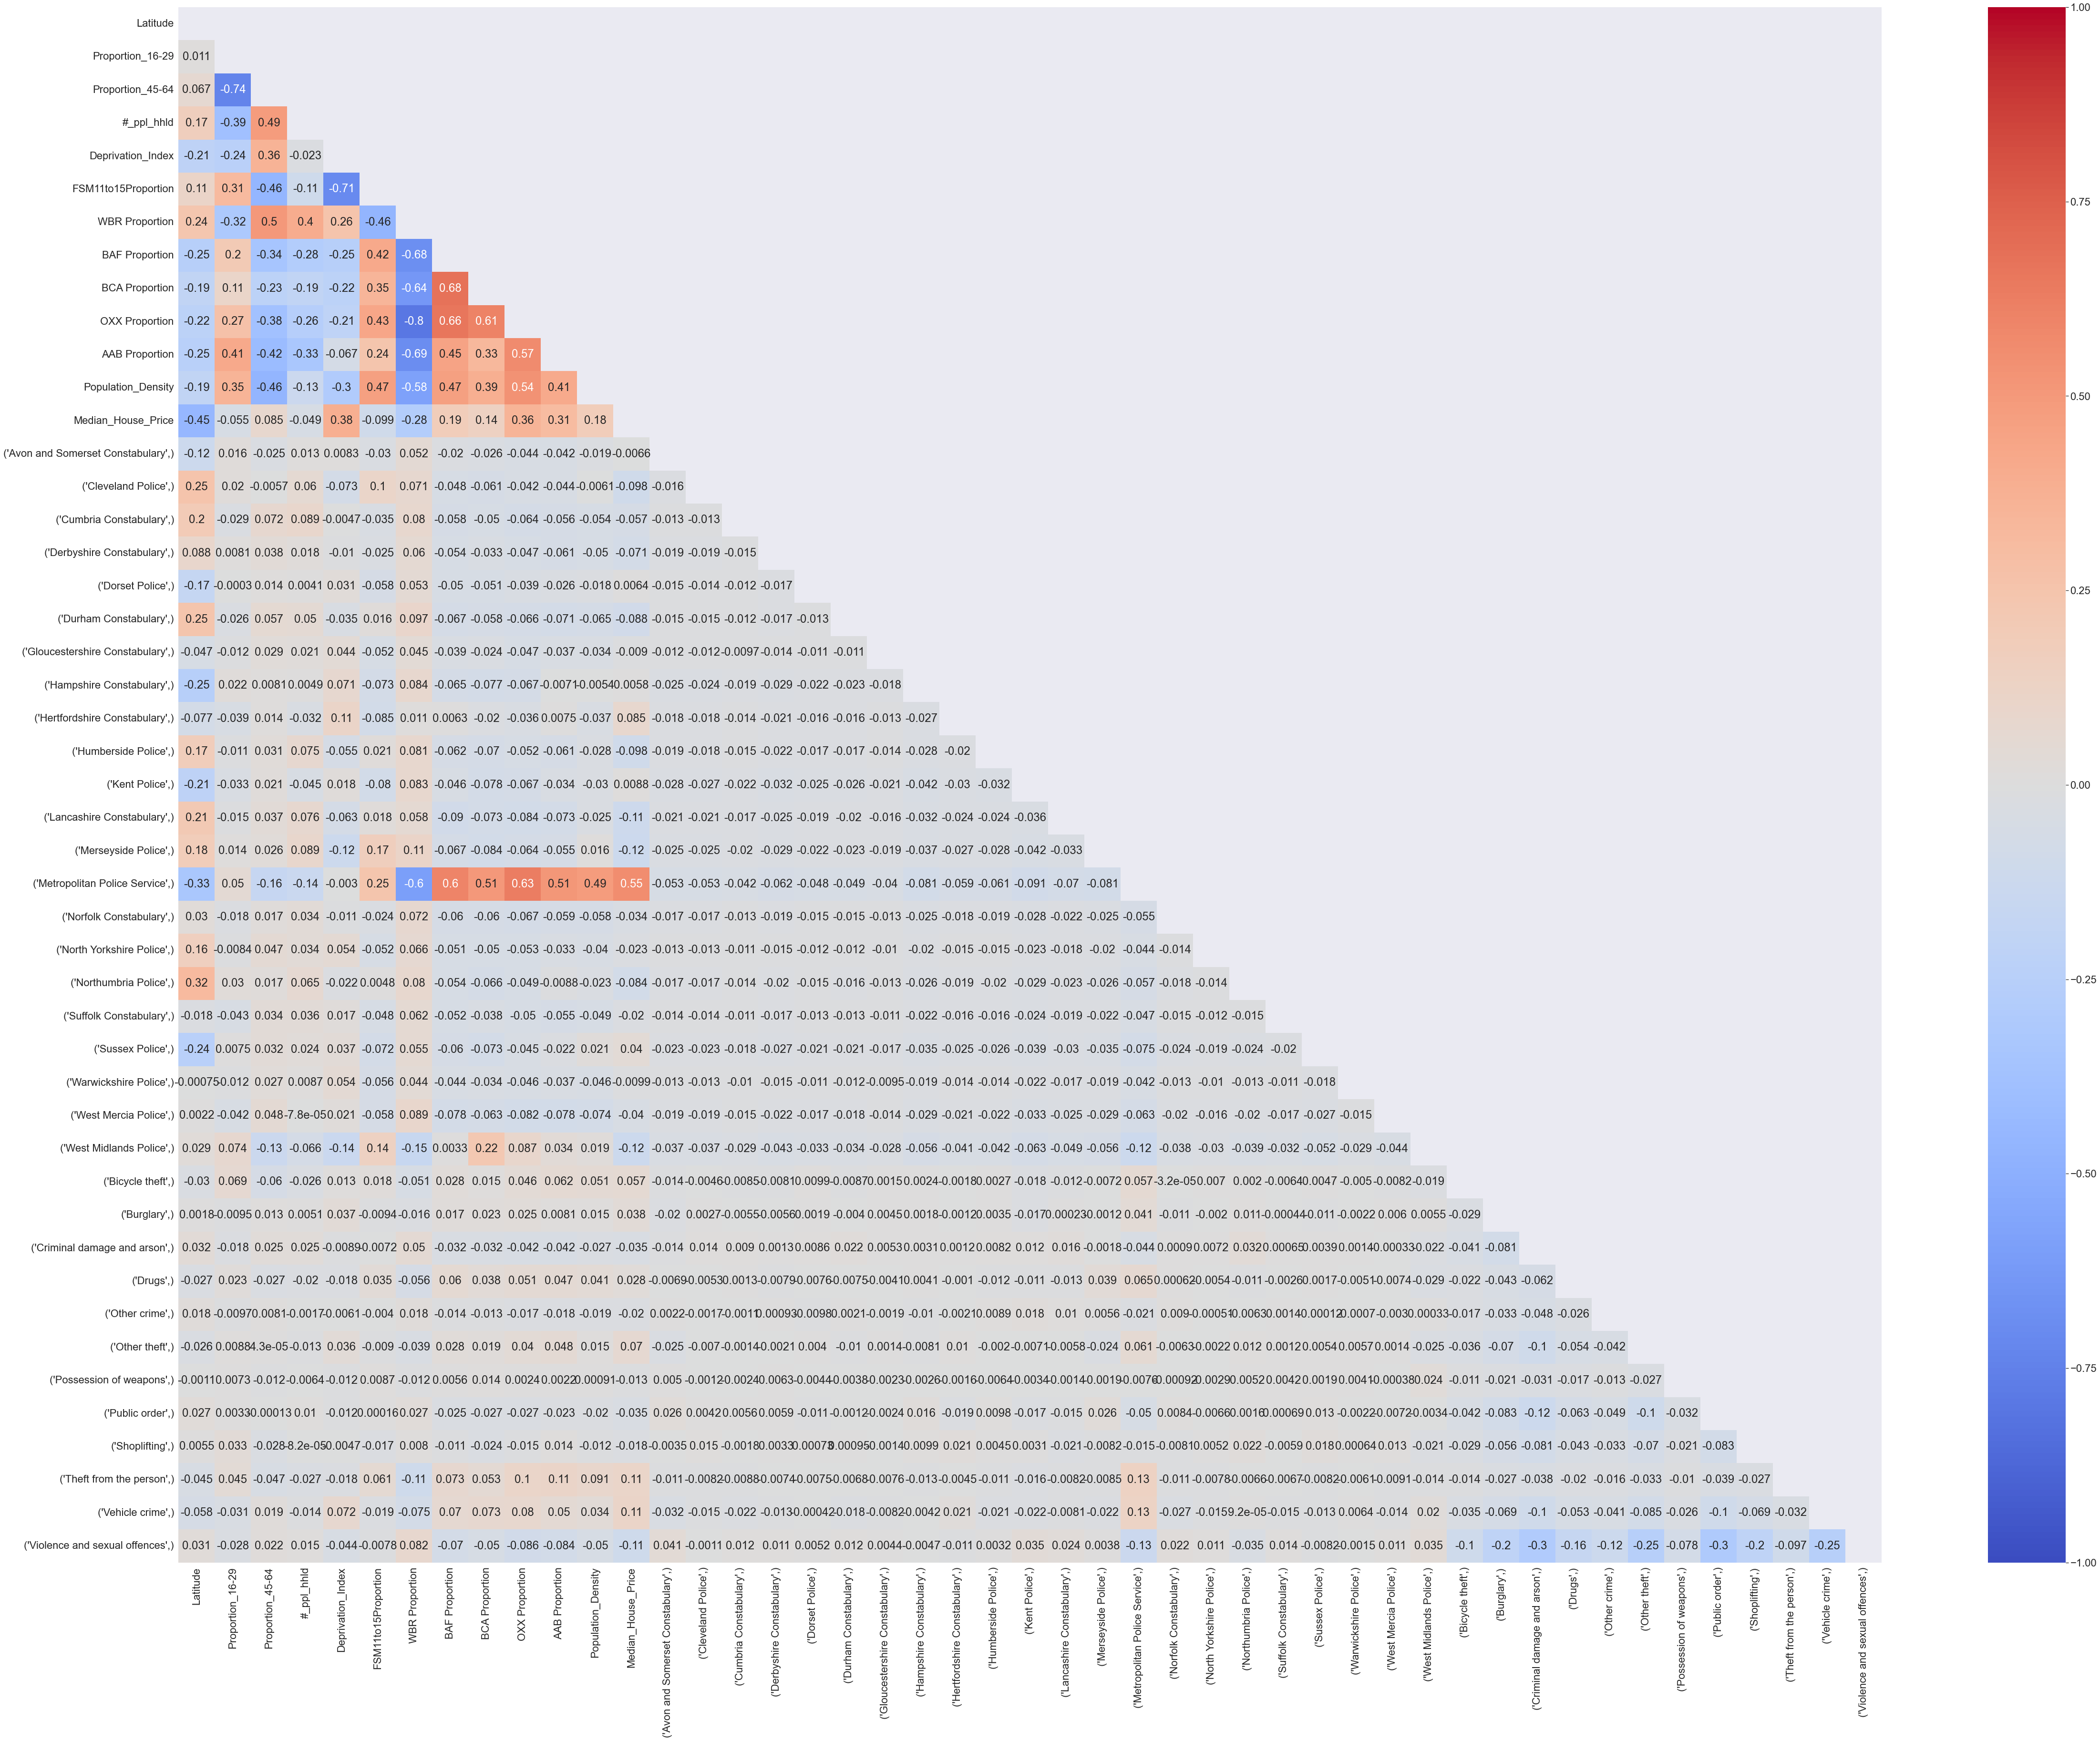

In [85]:
# Creating the figure and setting the font
plt.figure(figsize=(80,60))
sns.set(font_scale=2)

# Creating mask of duplicated combinations
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Creating heatmap
sns.heatmap(corr_mat, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)

# Showing the plot
plt.show()

We are setting the "tolerance" for multicollinearity at |0.7| (i.e., we need to remove one of the features that are correlated above 0.7 and below -0.7 ). Based on this criteria, we need to decide between:

* Proportion45_64 OR Proportion16_29
* Deprivation Index OR FSM11-15
* OXX Proportion OR WBR Proportion

We can look at the odds coefficients of each pair and select the one with the highest absolute value.

In [86]:
coef_table

Features  Coefficients  Odds Ratios  P-values
2                              Latitude         -0.22         0.80      0.00
6                      Proportion_16-29         -0.20         0.82      0.03
8                      Proportion_45-64          0.19         1.21      0.03
11                           #_ppl_hhld         -0.25         0.78      0.04
12                    Deprivation_Index         -0.31         0.73      0.00
14                  FSM11to15Proportion          0.24         1.27      0.00
16                       WBR Proportion          0.32         1.38      0.00
21                       BAF Proportion         -0.46         0.63      0.00
22                       BCA Proportion          0.16         1.17      0.00
23                       OXX Proportion         -0.46         0.63      0.00
25                       AAB Proportion          0.17         1.18      0.00
26                   Population_Density          0.45         1.56      0.00
27                   Median_House_Price         -0.75         0.47      0.00
31  ('Avon and Somerset Constabulary',)          3.10        22.10      0.00
35                ('Cleveland Police',)          0.23         1.26      0.00
36            ('Cumbria Constabulary',)          0.49         1.63      0.00
37         ('Derbyshire Constabulary',)          0.20         1.22      0.00
39                   ('Dorset Police',)          0.16         1.17      0.00
40             ('Durham Constabulary',)          0.23         1.26      0.00
42    ('Gloucestershire Constabulary',)          0.35         1.41      0.00
43          ('Hampshire Constabulary',)         -0.37         0.69      0.00
44      ('Hertfordshire Constabulary',)          0.24         1.27      0.00
45               ('Humberside Police',)          0.27         1.31      0.00
46                     ('Kent Police',)          0.18         1.20      0.00
47         ('Lancashire Constabulary',)          0.26         1.30      0.00
50               ('Merseyside Police',)         -0.20         0.82      0.00
51     ('Metropolitan Police Service',)         -3.12         0.04      0.00
52            ('Norfolk Constabulary',)          0.73         2.07      0.00
53          ('North Yorkshire Police',)          0.53         1.71      0.00
55              ('Northumbria Police',)         -2.74         0.06      0.00
59            ('Suffolk Constabulary',)          0.47         1.60      0.00
61                   ('Sussex Police',)         -0.54         0.58      0.00
63             ('Warwickshire Police',)          0.37         1.45      0.00
64              ('West Mercia Police',)          0.40         1.49      0.00
65            ('West Midlands Police',)         -0.65         0.52      0.01
68                   ('Bicycle theft',)         -2.18         0.11      0.00
69                        ('Burglary',)         -1.65         0.19      0.00
70       ('Criminal damage and arson',)         -0.73         0.48      0.00
71                           ('Drugs',)          4.27        71.25      0.00
72                     ('Other crime',)          1.30         3.66      0.00
73                     ('Other theft',)         -1.23         0.29      0.00
74           ('Possession of weapons',)          1.88         6.59      0.00
75                    ('Public order',)          0.57         1.76      0.00
77                     ('Shoplifting',)         -0.51         0.60      0.00
78           ('Theft from the person',)         -0.99         0.37      0.00
79                   ('Vehicle crime',)         -2.15         0.12      0.00
80    ('Violence and sexual offences',)          1.45         4.27      0.00

We see that:

**Proportion45_64 OR Proportion16_29**

We should drop the Proportions45-64 as it has a lower absolute coefficient (albeit marginally)

**Deprivation Index OR FSM11-15**

We should drop FSM11-15 as it has a lower absolute coefficient than Deprivation Index

**OXX Proportion OR WBR Proportion**

We should drop WBR Proportion as it has a lower absolute coefficient than OXX Proportion

Let's remove these three from our train and validation sets:

In [87]:
# Dropping columns
X_train_featsel1.drop(axis=0, columns=['Proportion_45-64', 'FSM11to15Proportion', 'WBR Proportion'], inplace=True)
X_validation_featsel1.drop(axis=0, columns=['Proportion_45-64', 'FSM11to15Proportion', 'WBR Proportion'], inplace=True)

In [88]:
# Checking how many columns we have
X_train_featsel1.shape

(182214, 44)

In [89]:
# Checking the columns
X_train_featsel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182214 entries, 0 to 182213
Data columns (total 44 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Latitude                             182214 non-null  float64
 1   Proportion_16-29                     182214 non-null  float64
 2   #_ppl_hhld                           182214 non-null  float64
 3   Deprivation_Index                    182214 non-null  float64
 4   BAF Proportion                       182214 non-null  float64
 5   BCA Proportion                       182214 non-null  float64
 6   OXX Proportion                       182214 non-null  float64
 7   AAB Proportion                       182214 non-null  float64
 8   Population_Density                   182214 non-null  float64
 9   Median_House_Price                   182214 non-null  float64
 10  ('Avon and Somerset Constabulary',)  182214 non-null  float64
 11  ('Cleveland P

In [90]:
# Checking how many columns we have
X_validation_featsel1.shape

(78093, 44)

In [91]:
# Checking the columns
X_validation_featsel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78093 entries, 0 to 78092
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Latitude                             78093 non-null  float64
 1   Proportion_16-29                     78093 non-null  float64
 2   #_ppl_hhld                           78093 non-null  float64
 3   Deprivation_Index                    78093 non-null  float64
 4   BAF Proportion                       78093 non-null  float64
 5   BCA Proportion                       78093 non-null  float64
 6   OXX Proportion                       78093 non-null  float64
 7   AAB Proportion                       78093 non-null  float64
 8   Population_Density                   78093 non-null  float64
 9   Median_House_Price                   78093 non-null  float64
 10  ('Avon and Somerset Constabulary',)  78093 non-null  float64
 11  ('Cleveland Police',)       

In [92]:
# Confirming that y rows match the x 
y_train.shape

(182214,)

In [93]:
# Confirming that y rows match the x 
y_validation.shape

(78093,)

We were able to almost halve the number of columns! Let's see if this has an effect on the model accuracy:

Now we're ready to fit a model on this:

In [94]:
# Instanitate model choosing a random state so that results are reproducible
logreg_featsel1 = LogisticRegression(random_state=2307, max_iter=10000, C=0.1)

# Fit model 
logreg_featsel1.fit(X_train_featsel1, y_train)

# Score the model
scores_train1 = logreg_featsel1.score(X_train_featsel1, y_train)
scores_validation1 = logreg_featsel1.score(X_validation_featsel1, y_validation)

# Print the accuracy scores
print("Score on train, logistic model on Thresholded & Feature Selected data:", "{:.2f}".format(scores_train1))
print("Score on validation, logistic model on Thresholded & Feature Selected data:", "{:.2f}".format(scores_validation1))

Score on train, logistic model on Thresholded & Feature Selected data: 0.81
Score on validation, logistic model on Thresholded & Feature Selected data: 0.81


This model does well on the Train set but really poorly on the validation set.

Now let's create the confusion matrix:

In [95]:
# Get class predictions
y_pred = logreg_featsel1.predict(X_validation_featsel1)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_validation, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Suspect Not Identified", "Predicted Suspect Identified"],
    index=["True Suspect Not Identified", "True Suspect Identified"]
)

display(cf_df)

Predicted Suspect Not Identified  \
True Suspect Not Identified                             27810   
True Suspect Identified                                  6811   

                             Predicted Suspect Identified  
True Suspect Not Identified                          7727  
True Suspect Identified                             35745

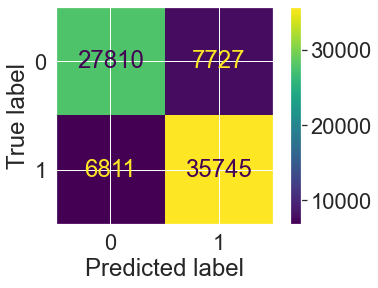

In [96]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(logreg_featsel1, X_validation_featsel1, y_validation);

In [97]:
# Let's look at the report
report = classification_report(y_validation, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     35537
           1       0.82      0.84      0.83     42556

    accuracy                           0.81     78093
   macro avg       0.81      0.81      0.81     78093
weighted avg       0.81      0.81      0.81     78093



In [98]:
# Filling in the temporary model score
model_scores_temp = pd.DataFrame({'Name': ["Logistic Model 5"], 'Transformation': ["Scaled data"], 'Optimization': ["C=0.1"], 'Features': ['44 (VT & Feature Selection)'], 'Accuracy on Validation': [scores_validation1*100], 'F1-score on Validation': [f1_score(y_validation, y_pred)*100]})

In [99]:
# Keeping score
model_scores = model_scores.append(model_scores_temp, ignore_index=True)
model_scores

Name                 Transformation Optimization  \
0  Base Logistic Model                           None         None   
1     Logistic Model 1                    Scaled data         None   
2     Logistic Model 2                    Scaled data        C=0.1   
3     Logistic Model 3  Scaled & log-transformed data        C=0.1   
4     Logistic Model 4                    Scaled data        C=0.1   
5     Logistic Model 5                    Scaled data        C=0.1   

                      Features  Accuracy on Validation  F1-score on Validation  
0                           87                   61.45                   69.17  
1                           87                   81.32                   83.06  
2                           87                   81.32                   83.05  
3                           87                   81.32                   83.06  
4                      81 (VT)                   81.33                   83.06  
5  44 (VT & Feature Selection)                   81.38                   83.10

Based on the table above, manual selection helped to marginally improve the accuracy and F1 score, and at almost half the columns! We can try selecting our features with K-best to see how it compares.

<a id='2e'></a>
### 2e) Scaled Model with Feature Selection (KBest)

We're going back to using scaled data.

Now, we can loop through different k-values and see which features get selected based on varying number of k:

In [100]:
train_scores = []
validation_scores = []

ks = list(range(1, 88))
for k in ks:
    my_KBest = SelectKBest(f_regression, k=k).fit(X_train_scaled, y_train)
    
    X_train_selected = my_KBest.transform(X_train_scaled)
    X_validation_selected = my_KBest.transform(X_validation_scaled)
    
    logreg_scaled.fit(X_train_selected, y_train)
    
    print(f"k = {k}, {np.array(X_train.columns)[my_KBest.get_support()]}")
    # Store the scores of my model
    train_scores.append(logreg_scaled.score(X_train_selected, y_train))
    validation_scores.append(logreg_scaled.score(X_validation_selected, y_validation))

k = 1, ["('Violence and sexual offences',)"]
k = 2, ["('Metropolitan Police Service',)" "('Violence and sexual offences',)"]
k = 3, ["('Metropolitan Police Service',)" "('Vehicle crime',)"
 "('Violence and sexual offences',)"]
k = 4, ['OXX Proportion' "('Metropolitan Police Service',)" "('Vehicle crime',)"
 "('Violence and sexual offences',)"]
k = 5, ['WBR Proportion' 'OXX Proportion' "('Metropolitan Police Service',)"
 "('Vehicle crime',)" "('Violence and sexual offences',)"]
k = 6, ['WBR Proportion' 'OXX Proportion' 'Median_House_Price'
 "('Metropolitan Police Service',)" "('Vehicle crime',)"
 "('Violence and sexual offences',)"]
k = 7, ['WBR Proportion' 'OXX Proportion' 'MIX Proportion' 'Median_House_Price'
 "('Metropolitan Police Service',)" "('Vehicle crime',)"
 "('Violence and sexual offences',)"]
k = 8, ['WBR Proportion' 'WAO Proportion' 'OXX Proportion' 'MIX Proportion'
 'Median_House_Price' "('Metropolitan Police Service',)"
 "('Vehicle crime',)" "('Violence and sexual offence

k = 28, ['Longitude' 'Latitude' 'Proportion_30-44' 'Proportion_65+'
 'WBR Proportion' 'WAO Proportion' 'ABD Proportion' 'AIN Proportion'
 'BAF Proportion' 'BCA Proportion' 'OXX Proportion' 'MIX Proportion'
 'AAB Proportion' 'Population_Density' 'Median_House_Price'
 'Median_house_price_CAGR_1995-2021' "('Avon and Somerset Constabulary',)"
 "('Metropolitan Police Service',)" "('Northumbria Police',)"
 "('Bicycle theft',)" "('Burglary',)" "('Criminal damage and arson',)"
 "('Drugs',)" "('Other theft',)" "('Shoplifting',)"
 "('Theft from the person',)" "('Vehicle crime',)"
 "('Violence and sexual offences',)"]
k = 29, ['Longitude' 'Latitude' 'Proportion_30-44' 'Proportion_65+'
 'WBR Proportion' 'WAO Proportion' 'ABD Proportion' 'AIN Proportion'
 'BAF Proportion' 'BCA Proportion' 'OXX Proportion' 'MIX Proportion'
 'AAB Proportion' 'Population_Density' 'Median_House_Price'
 'Median_house_price_CAGR_1995-2021' 'Median Age'
 "('Avon and Somerset Constabulary',)" "('Metropolitan Police Service

k = 40, ['Longitude' 'Latitude' 'Proportion_30-44' 'Proportion_45-64'
 'Proportion_65+' 'Proportion_0car_hhlds' '#_ppl_hhld' 'Deprivation_Index'
 'Job_Seeker_Allowance_Proportion' 'FSM11to15Proportion' 'WBR Proportion'
 'WAO Proportion' 'ABD Proportion' 'AIN Proportion' 'BAF Proportion'
 'BCA Proportion' 'OXX Proportion' 'MIX Proportion' 'AAB Proportion'
 'Population_Density' 'Median_House_Price'
 'Median_house_price_CAGR_1995-2021' 'Median Age'
 'Proportion of Religious' "('Avon and Somerset Constabulary',)"
 "('Kent Police',)" "('Metropolitan Police Service',)"
 "('Norfolk Constabulary',)" "('Northumbria Police',)"
 "('Bicycle theft',)" "('Burglary',)" "('Criminal damage and arson',)"
 "('Drugs',)" "('Other crime',)" "('Other theft',)" "('Public order',)"
 "('Shoplifting',)" "('Theft from the person',)" "('Vehicle crime',)"
 "('Violence and sexual offences',)"]
k = 41, ['Longitude' 'Latitude' 'Proportion_30-44' 'Proportion_45-64'
 'Proportion_65+' 'Proportion_0car_hhlds' '#_ppl_hhld'

k = 49, ['Longitude' 'Latitude' 'Population' 'Proportion_Males' 'Proportion_30-44'
 'Proportion_45-64' 'Proportion_65+' 'Proportion_0car_hhlds' '#_ppl_hhld'
 'Deprivation_Index' 'Job_Seeker_Allowance_Proportion'
 'FSM11to15Proportion' 'FSM5to10Proportion' 'WBR Proportion'
 'WAO Proportion' 'ABD Proportion' 'AIN Proportion' 'BAF Proportion'
 'BCA Proportion' 'OXX Proportion' 'MIX Proportion' 'AAB Proportion'
 'Population_Density' 'Median_House_Price'
 'Median_house_price_CAGR_1995-2021' 'Median Age'
 'Proportion of Religious' "('Avon and Somerset Constabulary',)"
 "('Cheshire Constabulary',)" "('Essex Police',)" "('Kent Police',)"
 "('Lancashire Constabulary',)" "('Merseyside Police',)"
 "('Metropolitan Police Service',)" "('Norfolk Constabulary',)"
 "('Northumbria Police',)" "('West Mercia Police',)" "('Bicycle theft',)"
 "('Burglary',)" "('Criminal damage and arson',)" "('Drugs',)"
 "('Other crime',)" "('Other theft',)" "('Possession of weapons',)"
 "('Public order',)" "('Shoplifting'

k = 56, ['Longitude' 'Latitude' 'Population' 'Proportion_Males' 'Proportion_0-15'
 'Proportion_16-29' 'Proportion_30-44' 'Proportion_45-64' 'Proportion_65+'
 'Proportion_0car_hhlds' '#_ppl_hhld' 'Deprivation_Index'
 'Job_Seeker_Allowance_Proportion' 'FSM11to15Proportion'
 'FSM5to10Proportion' 'WBR Proportion' 'WAO Proportion' 'ABD Proportion'
 'AIN Proportion' 'BAF Proportion' 'BCA Proportion' 'OXX Proportion'
 'MIX Proportion' 'AAB Proportion' 'Population_Density'
 'Median_House_Price' 'Median_house_price_CAGR_1995-2021' 'Median Age'
 'Proportion of Religious' "('Avon and Somerset Constabulary',)"
 "('Cheshire Constabulary',)" "('Cumbria Constabulary',)"
 "('Derbyshire Constabulary',)" "('Devon & Cornwall Police',)"
 "('Essex Police',)" "('Kent Police',)" "('Lancashire Constabulary',)"
 "('Merseyside Police',)" "('Metropolitan Police Service',)"
 "('Norfolk Constabulary',)" "('Northumbria Police',)"
 "('Suffolk Constabulary',)" "('West Mercia Police',)"
 "('West Yorkshire Police',)" "

k = 63, ['Longitude' 'Latitude' 'Population' 'Proportion_Males' 'Proportion_0-15'
 'Proportion_16-29' 'Proportion_30-44' 'Proportion_45-64' 'Proportion_65+'
 'Proportion_0car_hhlds' '#_ppl_hhld' 'Deprivation_Index'
 'Job_Seeker_Allowance_Proportion' 'FSM11to15Proportion'
 'FSM5to10Proportion' 'WBR Proportion' 'WAO Proportion' 'ABD Proportion'
 'AIN Proportion' 'BAF Proportion' 'BCA Proportion' 'OXX Proportion'
 'MIX Proportion' 'AAB Proportion' 'Population_Density'
 'Median_House_Price' 'Median_house_price_CAGR_1995-2021' 'Median Age'
 'Proportion of Religious' "('Avon and Somerset Constabulary',)"
 "('Cheshire Constabulary',)" "('Cleveland Police',)"
 "('Cumbria Constabulary',)" "('Derbyshire Constabulary',)"
 "('Devon & Cornwall Police',)" "('Durham Constabulary',)"
 "('Essex Police',)" "('Humberside Police',)" "('Kent Police',)"
 "('Lancashire Constabulary',)" "('Merseyside Police',)"
 "('Metropolitan Police Service',)" "('Norfolk Constabulary',)"
 "('North Yorkshire Police',)" "('N

k = 69, ['Longitude' 'Latitude' 'Population' 'Proportion_Males' 'Proportion_0-15'
 'Proportion_16-29' 'Proportion_30-44' 'Proportion_45-64' 'Proportion_65+'
 'Proportion_0car_hhlds' '#_ppl_hhld' 'Deprivation_Index'
 'Job_Seeker_Allowance_Proportion' 'FSM11to15Proportion'
 'FSM5to10Proportion' 'WBR Proportion' 'WAO Proportion' 'ABD Proportion'
 'AIN Proportion' 'BAF Proportion' 'BCA Proportion' 'OXX Proportion'
 'MIX Proportion' 'AAB Proportion' 'Population_Density'
 'Median_House_Price' 'Median_house_price_CAGR_1995-2021' 'Median Age'
 'Proportion of Religious' "('Avon and Somerset Constabulary',)"
 "('Cheshire Constabulary',)" "('Cleveland Police',)"
 "('Cumbria Constabulary',)" "('Derbyshire Constabulary',)"
 "('Devon & Cornwall Police',)" "('Dorset Police',)"
 "('Durham Constabulary',)" "('Essex Police',)"
 "('Gloucestershire Constabulary',)" "('Humberside Police',)"
 "('Kent Police',)" "('Lancashire Constabulary',)"
 "('Leicestershire Police',)" "('Lincolnshire Police',)"
 "('Merse

k = 74, ['Longitude' 'Latitude' 'Population' 'Proportion_Males' 'Proportion_0-15'
 'Proportion_16-29' 'Proportion_30-44' 'Proportion_45-64' 'Proportion_65+'
 'Proportion_0car_hhlds' '#_ppl_hhld' 'Deprivation_Index'
 'Job_Seeker_Allowance_Proportion' 'FSM11to15Proportion'
 'FSM5to10Proportion' 'WBR Proportion' 'WAO Proportion' 'ABD Proportion'
 'AIN Proportion' 'BAF Proportion' 'BCA Proportion' 'OXX Proportion'
 'MIX Proportion' 'AAB Proportion' 'Area Sq Km' 'Population_Density'
 'Median_House_Price' 'Median_house_price_CAGR_1995-2021' 'Median Age'
 'Proportion of Religious' "('Avon and Somerset Constabulary',)"
 "('Cambridgeshire Constabulary',)" "('Cheshire Constabulary',)"
 "('Cleveland Police',)" "('Cumbria Constabulary',)"
 "('Derbyshire Constabulary',)" "('Devon & Cornwall Police',)"
 "('Dorset Police',)" "('Durham Constabulary',)" "('Essex Police',)"
 "('Gloucestershire Constabulary',)" "('Hertfordshire Constabulary',)"
 "('Humberside Police',)" "('Kent Police',)"
 "('Lancashire 

k = 79, ['Month' 'Longitude' 'Latitude' 'Population' 'Proportion_Males'
 'Proportion_0-15' 'Proportion_16-29' 'Proportion_30-44'
 'Proportion_45-64' 'Proportion_65+' 'Proportion_0car_hhlds' '#_ppl_hhld'
 'Deprivation_Index' 'Job_Seeker_Allowance_Proportion'
 'FSM11to15Proportion' 'FSM5to10Proportion' 'WBR Proportion'
 'WAO Proportion' 'ABD Proportion' 'AIN Proportion' 'BAF Proportion'
 'BCA Proportion' 'OXX Proportion' 'MIX Proportion' 'AAB Proportion'
 'Area Sq Km' 'Population_Density' 'Median_House_Price'
 'Median_house_price_CAGR_1995-2021' 'Median Age'
 'Proportion of Religious' "('Avon and Somerset Constabulary',)"
 "('Bedfordshire Police',)" "('Cambridgeshire Constabulary',)"
 "('Cheshire Constabulary',)" "('Cleveland Police',)"
 "('Cumbria Constabulary',)" "('Derbyshire Constabulary',)"
 "('Devon & Cornwall Police',)" "('Dorset Police',)"
 "('Durham Constabulary',)" "('Essex Police',)"
 "('Gloucestershire Constabulary',)" "('Hertfordshire Constabulary',)"
 "('Humberside Police',

k = 84, ['Month' 'Longitude' 'Latitude' 'Population' 'Proportion_Males'
 'Proportion_0-15' 'Proportion_16-29' 'Proportion_30-44'
 'Proportion_45-64' 'Proportion_65+' 'Proportion_0car_hhlds' '#_ppl_hhld'
 'Deprivation_Index' 'Job_Seeker_Allowance_Proportion'
 'FSM11to15Proportion' 'FSM5to10Proportion' 'WBR Proportion'
 'WAO Proportion' 'ABD Proportion' 'AIN Proportion' 'BAF Proportion'
 'BCA Proportion' 'OXX Proportion' 'MIX Proportion' 'AAB Proportion'
 'Area Sq Km' 'Population_Density' 'Median_House_Price'
 'Median_house_price_CAGR_1995-2021' 'Median Age'
 'Proportion of Religious' "('Avon and Somerset Constabulary',)"
 "('Bedfordshire Police',)" "('Cambridgeshire Constabulary',)"
 "('Cheshire Constabulary',)" "('City of London Police',)"
 "('Cleveland Police',)" "('Cumbria Constabulary',)"
 "('Derbyshire Constabulary',)" "('Devon & Cornwall Police',)"
 "('Dorset Police',)" "('Durham Constabulary',)" "('Essex Police',)"
 "('Gloucestershire Constabulary',)" "('Gwent Police',)"
 "('Hamp

Here we can see which minimum k achieves the highest accuracy:

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


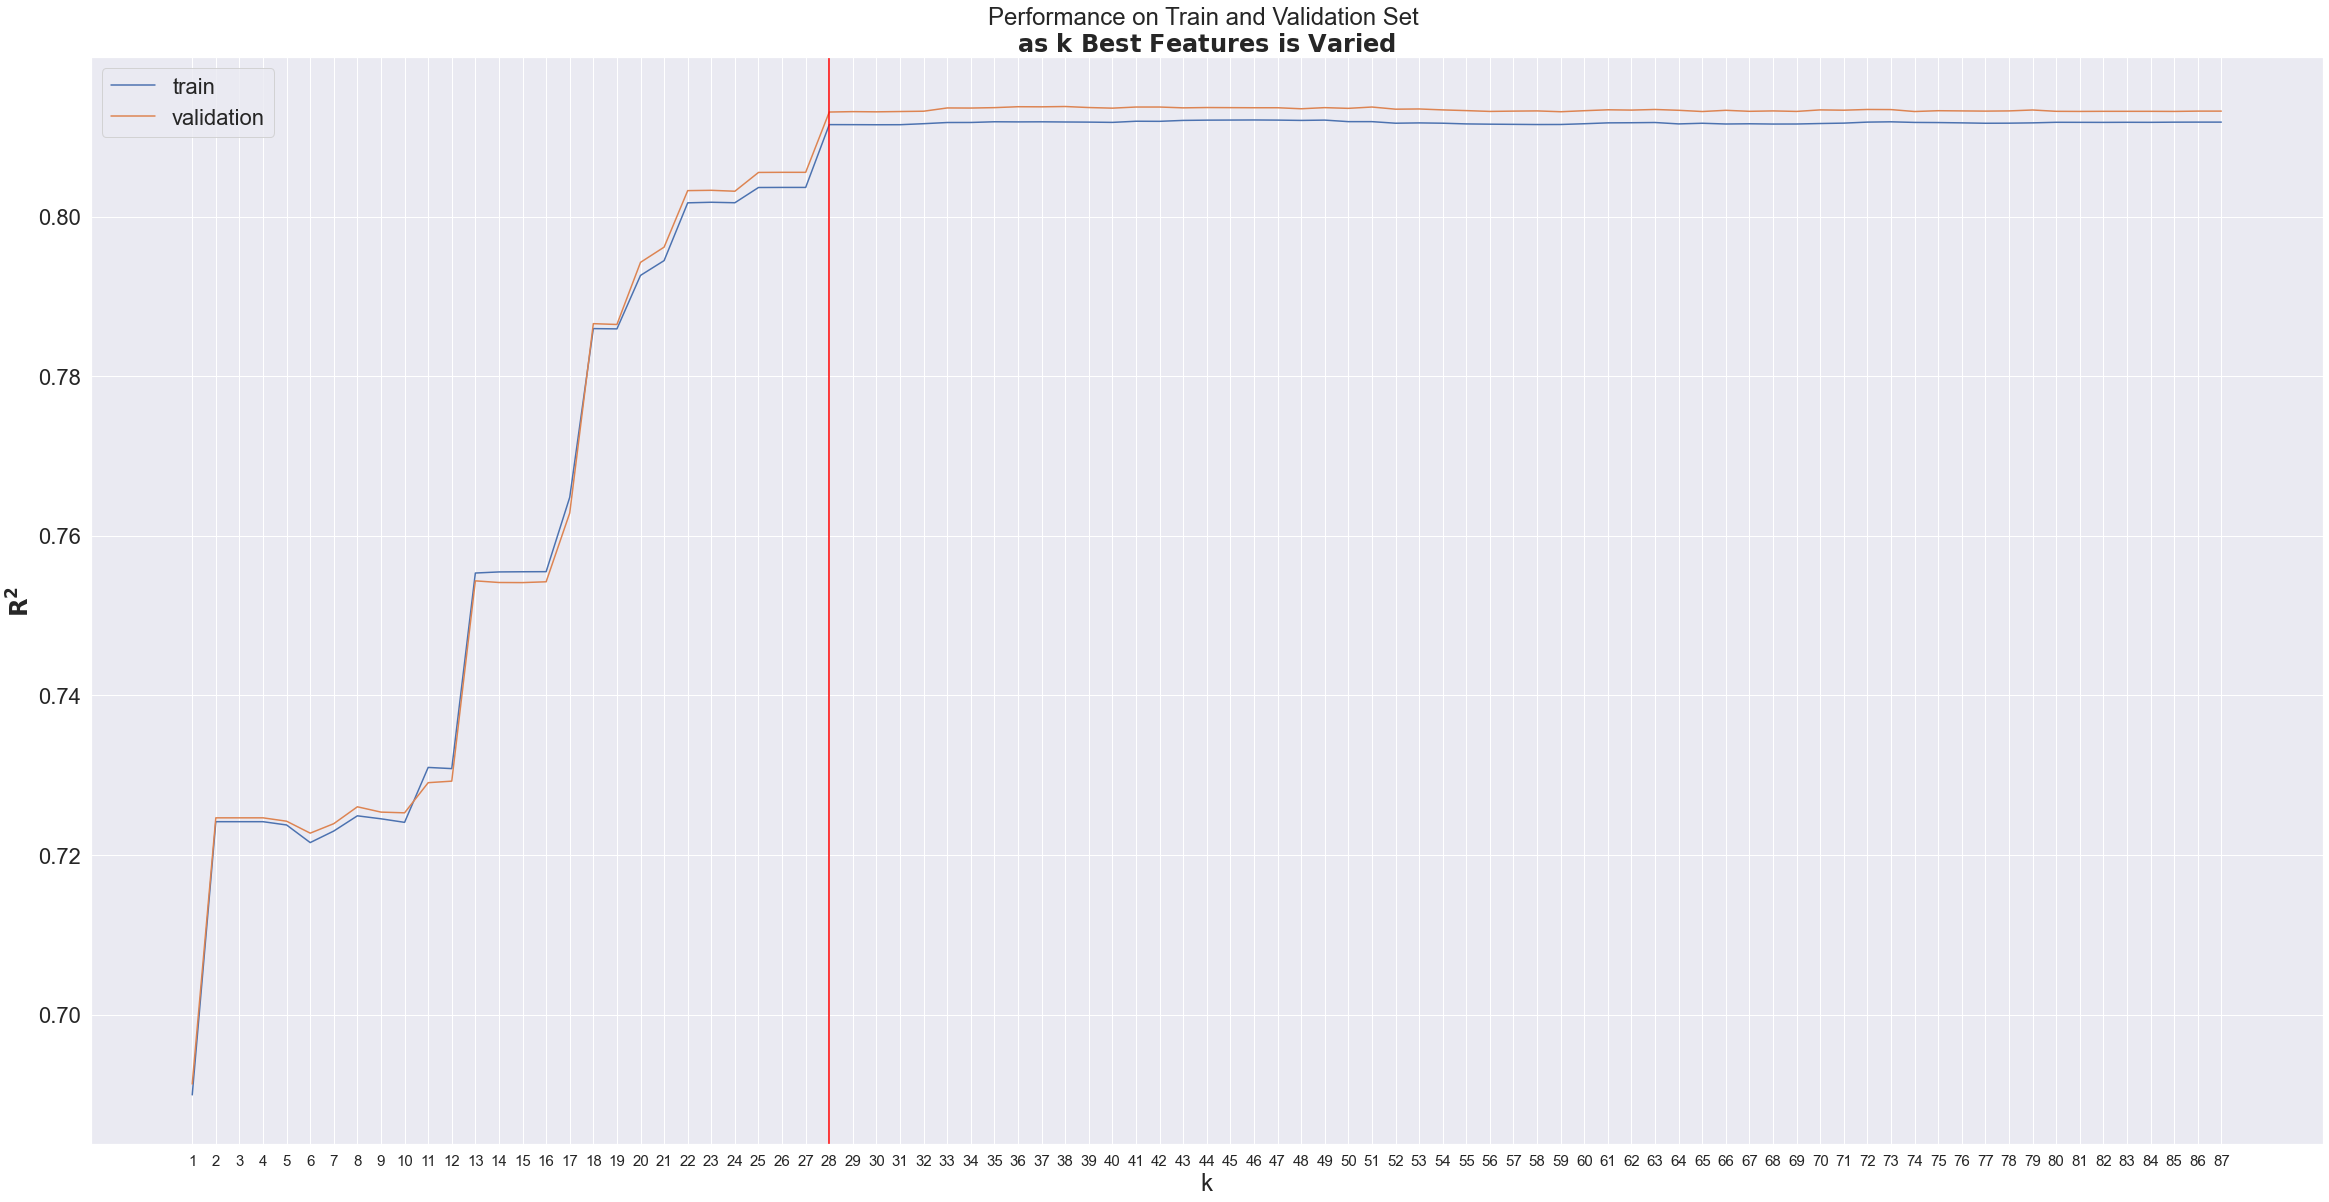

In [101]:
# Now let's plot which k brings the best accuracy
plt.figure(figsize=(40, 20))
plt.plot(ks, train_scores, label="train")
plt.plot(ks, validation_scores, label="validation")
plt.xticks(ks, fontsize=15)
plt.xlabel("k")
plt.ylabel("$R^2$")
plt.title("Performance on Train and Validation Set \nas $k$ Best Features is Varied")
plt.legend()
plt.axvline(x=28, c='red')
plt.show()

Looks like we're not getting any better performance after k=28 features.

In [102]:
# Instantiate KBest feature selector and fit
my_KBest = SelectKBest(f_regression, k=28)

my_KBest.fit(X_train_scaled, y_train)

SelectKBest(k=28, score_func=<function f_regression at 0x0000023D181EB1F0>)

The `get_support` method shows which columns to keep:

In [103]:
# Check which features were selected by the SelectKBest method
my_KBest.get_support()

array([False,  True,  True, False, False, False, False,  True, False,
        True, False, False, False, False, False, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True, False,
       False, False,  True,  True,  True,  True])

In [104]:
# Let's make X train and X validation into dataframes 
X_train_scaled_df = pd.DataFrame(data = X_train_scaled, columns=column_names)
X_validation_scaled_df = pd.DataFrame(data = X_validation_scaled, columns=column_names)

In [105]:
# Get names of selected features
np.array(X_train_scaled_df.columns)[my_KBest.get_support()]

array(['Longitude', 'Latitude', 'Proportion_30-44', 'Proportion_65+',
       'WBR Proportion', 'WAO Proportion', 'ABD Proportion',
       'AIN Proportion', 'BAF Proportion', 'BCA Proportion',
       'OXX Proportion', 'MIX Proportion', 'AAB Proportion',
       'Population_Density', 'Median_House_Price',
       'Median_house_price_CAGR_1995-2021',
       "('Avon and Somerset Constabulary',)",
       "('Metropolitan Police Service',)", "('Northumbria Police',)",
       "('Bicycle theft',)", "('Burglary',)",
       "('Criminal damage and arson',)", "('Drugs',)", "('Other theft',)",
       "('Shoplifting',)", "('Theft from the person',)",
       "('Vehicle crime',)", "('Violence and sexual offences',)"],
      dtype=object)

Nowe can look save the selected features as an array:

In [106]:
# Saving features
features_list_kbest = np.array(X_train.columns)[my_KBest.get_support()]

And we can use it to modify X_train and X_validation:

In [107]:
# Using the function we defined earlier
X_train_kbest = X_train.pipe(keep_cols, np.array(features_list_kbest))
X_train_kbest

Longitude  Latitude  Proportion_30-44  Proportion_65+  \
1150167      -2.82     54.05              0.21            0.13   
2768079      -1.95     52.51              0.21            0.13   
1038379       0.52     51.34              0.19            0.18   
1640778      -0.44     51.55              0.23            0.12   
45249        -2.65     50.95              0.21            0.10   
...            ...       ...               ...             ...   
1845199       0.01     51.57              0.38            0.08   
3231672      -0.49     51.75              0.13            0.27   
3098697      -1.60     53.85              0.20            0.14   
706099       -1.27     51.29              0.15            0.18   
349854       -1.45     52.89              0.14            0.34   

         WBR Proportion  WAO Proportion  ABD Proportion  AIN Proportion  \
1150167            0.94            0.02            0.00            0.00   
2768079            0.08            0.05            0.12            0.27   
1038379            0.89            0.01            0.00            0.02   
1640778            0.63            0.05            0.00            0.13   
45249              0.94            0.03            0.00            0.00   
...                 ...             ...             ...             ...   
1845199            0.28            0.18            0.03            0.12   
3231672            0.94            0.03            0.00            0.01   
3098697            0.81            0.03            0.00            0.02   
706099             0.94            0.02            0.00            0.00   
349854             0.88            0.03            0.00            0.03   

         BAF Proportion  BCA Proportion  OXX Proportion  MIX Proportion  \
1150167            0.01            0.00            0.00            0.02   
2768079            0.05            0.17            0.04            0.07   
1038379            0.03            0.00            0.01            0.02   
1640778            0.02            0.02            0.02            0.07   
45249              0.00            0.00            0.01            0.01   
...                 ...             ...             ...             ...   
1845199            0.08            0.06            0.07            0.07   
3231672            0.00            0.00            0.00            0.01   
3098697            0.01            0.00            0.05            0.05   
706099             0.01            0.00            0.00            0.02   
349854             0.01            0.01            0.01            0.02   

         AAB Proportion  Population_Density  Median_House_Price  \
1150167            0.01            7,367.00          129,000.00   
2768079            0.07            6,263.00          117,500.00   
1038379            0.00            4,750.00          264,000.00   
1640778            0.04            7,200.00          435,000.00   
45249              0.00            6,060.00          165,500.00   
...                 ...                 ...                 ...   
1845199            0.04            9,801.00          450,000.00   
3231672            0.01            3,303.00          685,000.00   
3098697            0.01            4,343.00          179,950.00   
706099             0.00               65.00          665,000.00   
349854             0.01            2,711.00          154,000.00   

         Median_house_price_CAGR_1995-2021  \
1150167                               0.05   
2768079                               0.06   
1038379                               0.07   
1640778                               0.07   
45249                                 0.08   
...                                    ...   
1845199                               0.09   
3231672                               0.07   
3098697                               0.06   
706099                                0.06   
349854                                0.05   

         ('Avon and Somerset Constabulary',)  \
1150167 

In [108]:
# Using the function we defined earlier
X_validation_kbest= X_validation.pipe(keep_cols, np.array(features_list_kbest))
X_validation_kbest

Longitude  Latitude  Proportion_30-44  Proportion_65+  \
111919        0.27     52.40              0.26            0.14   
2507452      -0.37     50.83              0.18            0.19   
3229876      -1.38     50.98              0.17            0.25   
1503217      -0.13     51.52              0.30            0.10   
2522176      -0.76     51.43              0.20            0.19   
...            ...       ...               ...             ...   
2836398      -1.86     52.45              0.22            0.05   
36145        -3.00     51.12              0.20            0.13   
1125444      -2.31     53.80              0.20            0.14   
198381       -2.71     53.38              0.17            0.28   
2615951      -0.70     51.50              0.18            0.22   

         WBR Proportion  WAO Proportion  ABD Proportion  AIN Proportion  \
111919             0.83            0.09            0.00            0.01   
2507452            0.93            0.02            0.00            0.00   
3229876            0.91            0.02            0.00            0.03   
1503217            0.36            0.17            0.06            0.04   
2522176            0.88            0.05            0.00            0.01   
...                 ...             ...             ...             ...   
2836398            0.07            0.04            0.02            0.10   
36145              0.94            0.04            0.00            0.00   
1125444            0.97            0.01            0.00            0.00   
198381             0.97            0.01            0.00            0.00   
2615951            0.76            0.07            0.00            0.08   

         BAF Proportion  BCA Proportion  OXX Proportion  MIX Proportion  \
111919             0.02            0.01            0.01            0.03   
2507452            0.01            0.00            0.00            0.02   
3229876            0.01            0.00            0.01            0.02   
1503217            0.05            0.01            0.07            0.10   
2522176            0.01            0.01            0.01            0.02   
...                 ...             ...             ...             ...   
2836398            0.03            0.02            0.04            0.03   
36145              0.00            0.00            0.00            0.01   
1125444            0.00            0.00            0.00            0.01   
198381             0.00            0.00            0.00            0.01   
2615951            0.02            0.01            0.01            0.03   

         AAB Proportion  Population_Density  Median_House_Price  \
111919             0.01            4,040.00          292,500.00   
2507452            0.01            5,862.00          325,000.00   
3229876            0.01            3,559.00          380,000.00   
1503217            0.13           14,797.00        1,100,000.00   
2522176            0.01              161.00          445,000.00   
...                 ...                 ...                 ...   
2836398            0.04           11,966.00          145,000.00   
36145              0.00            5,650.00          155,000.00   
1125444            0.01            4,438.00           65,000.00   
198381             0.00            3,095.00          165,000.00   
2615951            0.02              248.00          625,000.00   

         Median_house_price_CAGR_1995-2021  \
111919                                0.08   
2507452                               0.08   
3229876                               0.06   
1503217                               0.08   
2522176                               0.05   
...                                    ...   
2836398                               0.06   
36145                                 0.06   
1125444                               0.05   
198381                                0.04   
2615951                               0.06   

         ('Avon and Somerset Constabulary',)  \
111919  

Now we can instantiate the model on the 28 k-best columns:

In [109]:
# Instanitate model choosing a random state so that results are reproducible
logreg_kbest = LogisticRegression(random_state=2307, max_iter=10000, C=0.01)

# Fit model 
logreg_kbest.fit(X_train_kbest, y_train)

# Score the model
scores_train = logreg_kbest.score(X_train_kbest, y_train)
scores_validation = logreg_kbest.score(X_validation_kbest, y_validation)

# Print the accuracy scores
print("Score on train, logistic model on kbest data:", "{:.2f}".format(scores_train))
print("Score on validation, logistic model on kbest data:", "{:.2f}".format(scores_validation))

Score on train, logistic model on kbest data: 0.63
Score on validation, logistic model on kbest data: 0.64


Now let's create the confusion matrix:

In [110]:
# Get class predictions
y_pred = logreg_kbest.predict(X_validation_kbest)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_validation, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Suspect Not Identified", "Predicted Suspect Identified"],
    index=["True Suspect Not Identified", "True Suspect Identified"]
)

display(cf_df)

Predicted Suspect Not Identified  \
True Suspect Not Identified                             13874   
True Suspect Identified                                  6780   

                             Predicted Suspect Identified  
True Suspect Not Identified                         21663  
True Suspect Identified                             35776

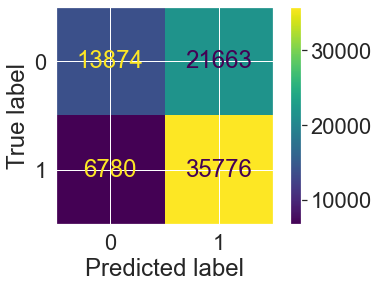

In [111]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(logreg_kbest, X_validation_kbest, y_validation);

In [112]:
# Let's look at the report
report = classification_report(y_validation, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.39      0.49     35537
           1       0.62      0.84      0.72     42556

    accuracy                           0.64     78093
   macro avg       0.65      0.62      0.60     78093
weighted avg       0.65      0.64      0.61     78093



In [113]:
# Filling in the temporary model score
model_scores_temp = pd.DataFrame({'Name': ["Logistic Model 6"], 'Transformation': ["Scaled data"], 'Optimization': ["C=0.1"], 'Features': ['28 (KBest)'], 'Accuracy on Validation': [scores_validation*100], 'F1-score on Validation': [f1_score(y_validation, y_pred)*100]})

In [114]:
# Keeping score
model_scores = model_scores.append(model_scores_temp, ignore_index=True)
model_scores

Name                 Transformation Optimization  \
0  Base Logistic Model                           None         None   
1     Logistic Model 1                    Scaled data         None   
2     Logistic Model 2                    Scaled data        C=0.1   
3     Logistic Model 3  Scaled & log-transformed data        C=0.1   
4     Logistic Model 4                    Scaled data        C=0.1   
5     Logistic Model 5                    Scaled data        C=0.1   
6     Logistic Model 6                    Scaled data        C=0.1   

                      Features  Accuracy on Validation  F1-score on Validation  
0                           87                   61.45                   69.17  
1                           87                   81.32                   83.06  
2                           87                   81.32                   83.05  
3                           87                   81.32                   83.06  
4                      81 (VT)                   81.33                   83.06  
5  44 (VT & Feature Selection)                   81.38                   83.10  
6                   28 (KBest)                   63.58                   71.56

Looks like model 5 is the best so far. Now let's try the Decision Tree.

<a id='3'></a>
## 3) Decision Tree

We will use the unscaled data to fit the decision tree and will see which depth has the best scores for both train and validation. We do it because Decision Tree model does not care about data being scaled or unscaled.

In [115]:

# list for storing accuracy for train and test
train_acc = []
validation_acc = []

# loop over max_depth values
for depth in range(1, 15):
    print(f"Fitting with max depth = {depth}")
    
    # fit the tree
    my_tree = DecisionTreeClassifier(max_depth=depth)
    my_tree.fit(X_train, y_train)
    
    # score on train and append accuracy to list
    train_acc.append(my_tree.score(X_train, y_train))
    
    # score on test and append to list
    validation_acc.append(my_tree.score(X_validation, y_validation))

Fitting with max depth = 1
Fitting with max depth = 2
Fitting with max depth = 3
Fitting with max depth = 4
Fitting with max depth = 5
Fitting with max depth = 6
Fitting with max depth = 7
Fitting with max depth = 8
Fitting with max depth = 9
Fitting with max depth = 10
Fitting with max depth = 11
Fitting with max depth = 12
Fitting with max depth = 13
Fitting with max depth = 14


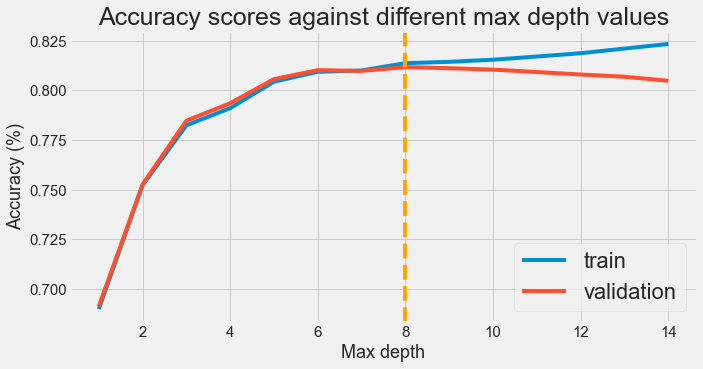

In [124]:
# Set plot default stye
with plt.style.context('fivethirtyeight'):
    # Plot the accuracy scores
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 15), train_acc, label="train")
    plt.plot(range(1, 15), validation_acc, label="validation")
    plt.legend()
    plt.title("Accuracy scores against different max depth values", fontsize = 25)
    plt.xlabel("Max depth", fontsize=18)
    plt.ylabel("Accuracy (%)", fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.axvline(x=8, c='orange', linestyle='--')
    plt.show()

Looks like Max depth = 8 ensures high accuracy without overfitting.

In [125]:
# Fitting the DT
Decision_Tree = DecisionTreeClassifier(max_depth = 8, random_state=2307)
dt_model = Decision_Tree.fit(X_train, y_train)
print(f"The classification accuracy on train set is: {Decision_Tree.score(X_train, y_train)}")
print(f"The classification accuracy on validation set is: {Decision_Tree.score(X_validation, y_validation)}")

The classification accuracy on train set is: 0.8136312248235591
The classification accuracy on validation set is: 0.8116604561228279


We can now look at feature importance:

In [126]:
# Feature importance
importances = Decision_Tree.tree_.compute_feature_importances(normalize=True)

# Put the variable names and their feature importances into a data frame
importances_df = pd.DataFrame({'Variable': X_train.columns,
                               'Normalized Importance': Decision_Tree.tree_.compute_feature_importances(normalize=True)})

importances_df

Variable  Normalized Importance
0                               Month                   0.00
1                           Longitude                   0.00
2                            Latitude                   0.00
3                          Population                   0.00
4                    Proportion_Males                   0.00
..                                ...                    ...
82                       ('Robbery',)                   0.00
83                   ('Shoplifting',)                   0.00
84         ('Theft from the person',)                   0.00
85                 ('Vehicle crime',)                   0.02
86  ('Violence and sexual offences',)                   0.37

[87 rows x 2 columns]

Let's look at the first 8 features:

In [127]:
# Sorting by ascending and looking at top 8 features
importances_df = importances_df.sort_values(by='Normalized Importance', ascending=False,ignore_index=True).head(8)
importances_df

Variable  Normalized Importance
0  ('Violence and sexual offences',)                   0.37
1   ('Metropolitan Police Service',)                   0.28
2                         ('Drugs',)                   0.10
3                  ('Public order',)                   0.10
4                   ('Other crime',)                   0.04
5            ('Northumbria Police',)                   0.03
6         ('Possession of weapons',)                   0.02
7                 ('Vehicle crime',)                   0.02

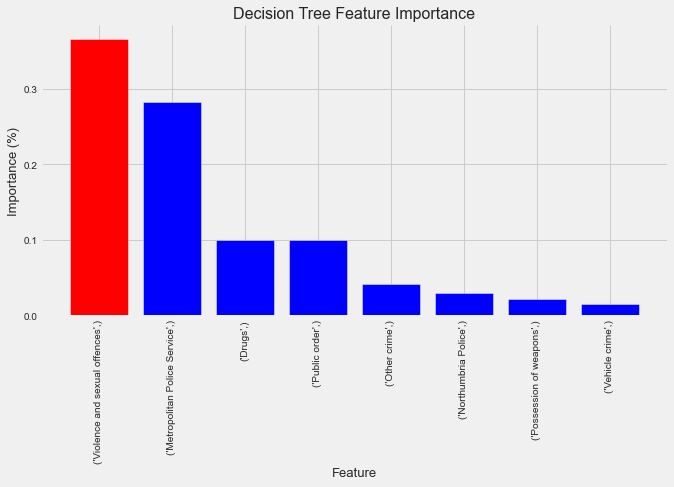

In [135]:
with plt.style.context('fivethirtyeight'):
# Plotting
    plt.figure(figsize=(10,5))
    plt.bar(importances_df['Variable'], importances_df['Normalized Importance'], color=['red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])
    plt.title('Decision Tree Feature Importance', fontsize=16)
    plt.ylabel('Importance (%)', fontsize=13)
    plt.xlabel('Feature', fontsize=13)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
    sns.despine()
    plt.show()

Decision Tree denotes Violence and Sexual Offences, Metropolitan Police Service and Drugs as top influencers of whether Suspect is identified or not. This is consistent with our expectations.

Now let's look at some trees!

In [136]:
# Import visualization
from sklearn import tree

In [137]:
# Let's take a look
Decision_Tree.fit(X_train, y_train).tree_

In [138]:
# Fitting the DT on maximum 3 features so we can visualize the result
Decision_Tree1 = DecisionTreeClassifier(max_depth = 3, random_state=2307)
dt_model1 = Decision_Tree1.fit(X_train, y_train)

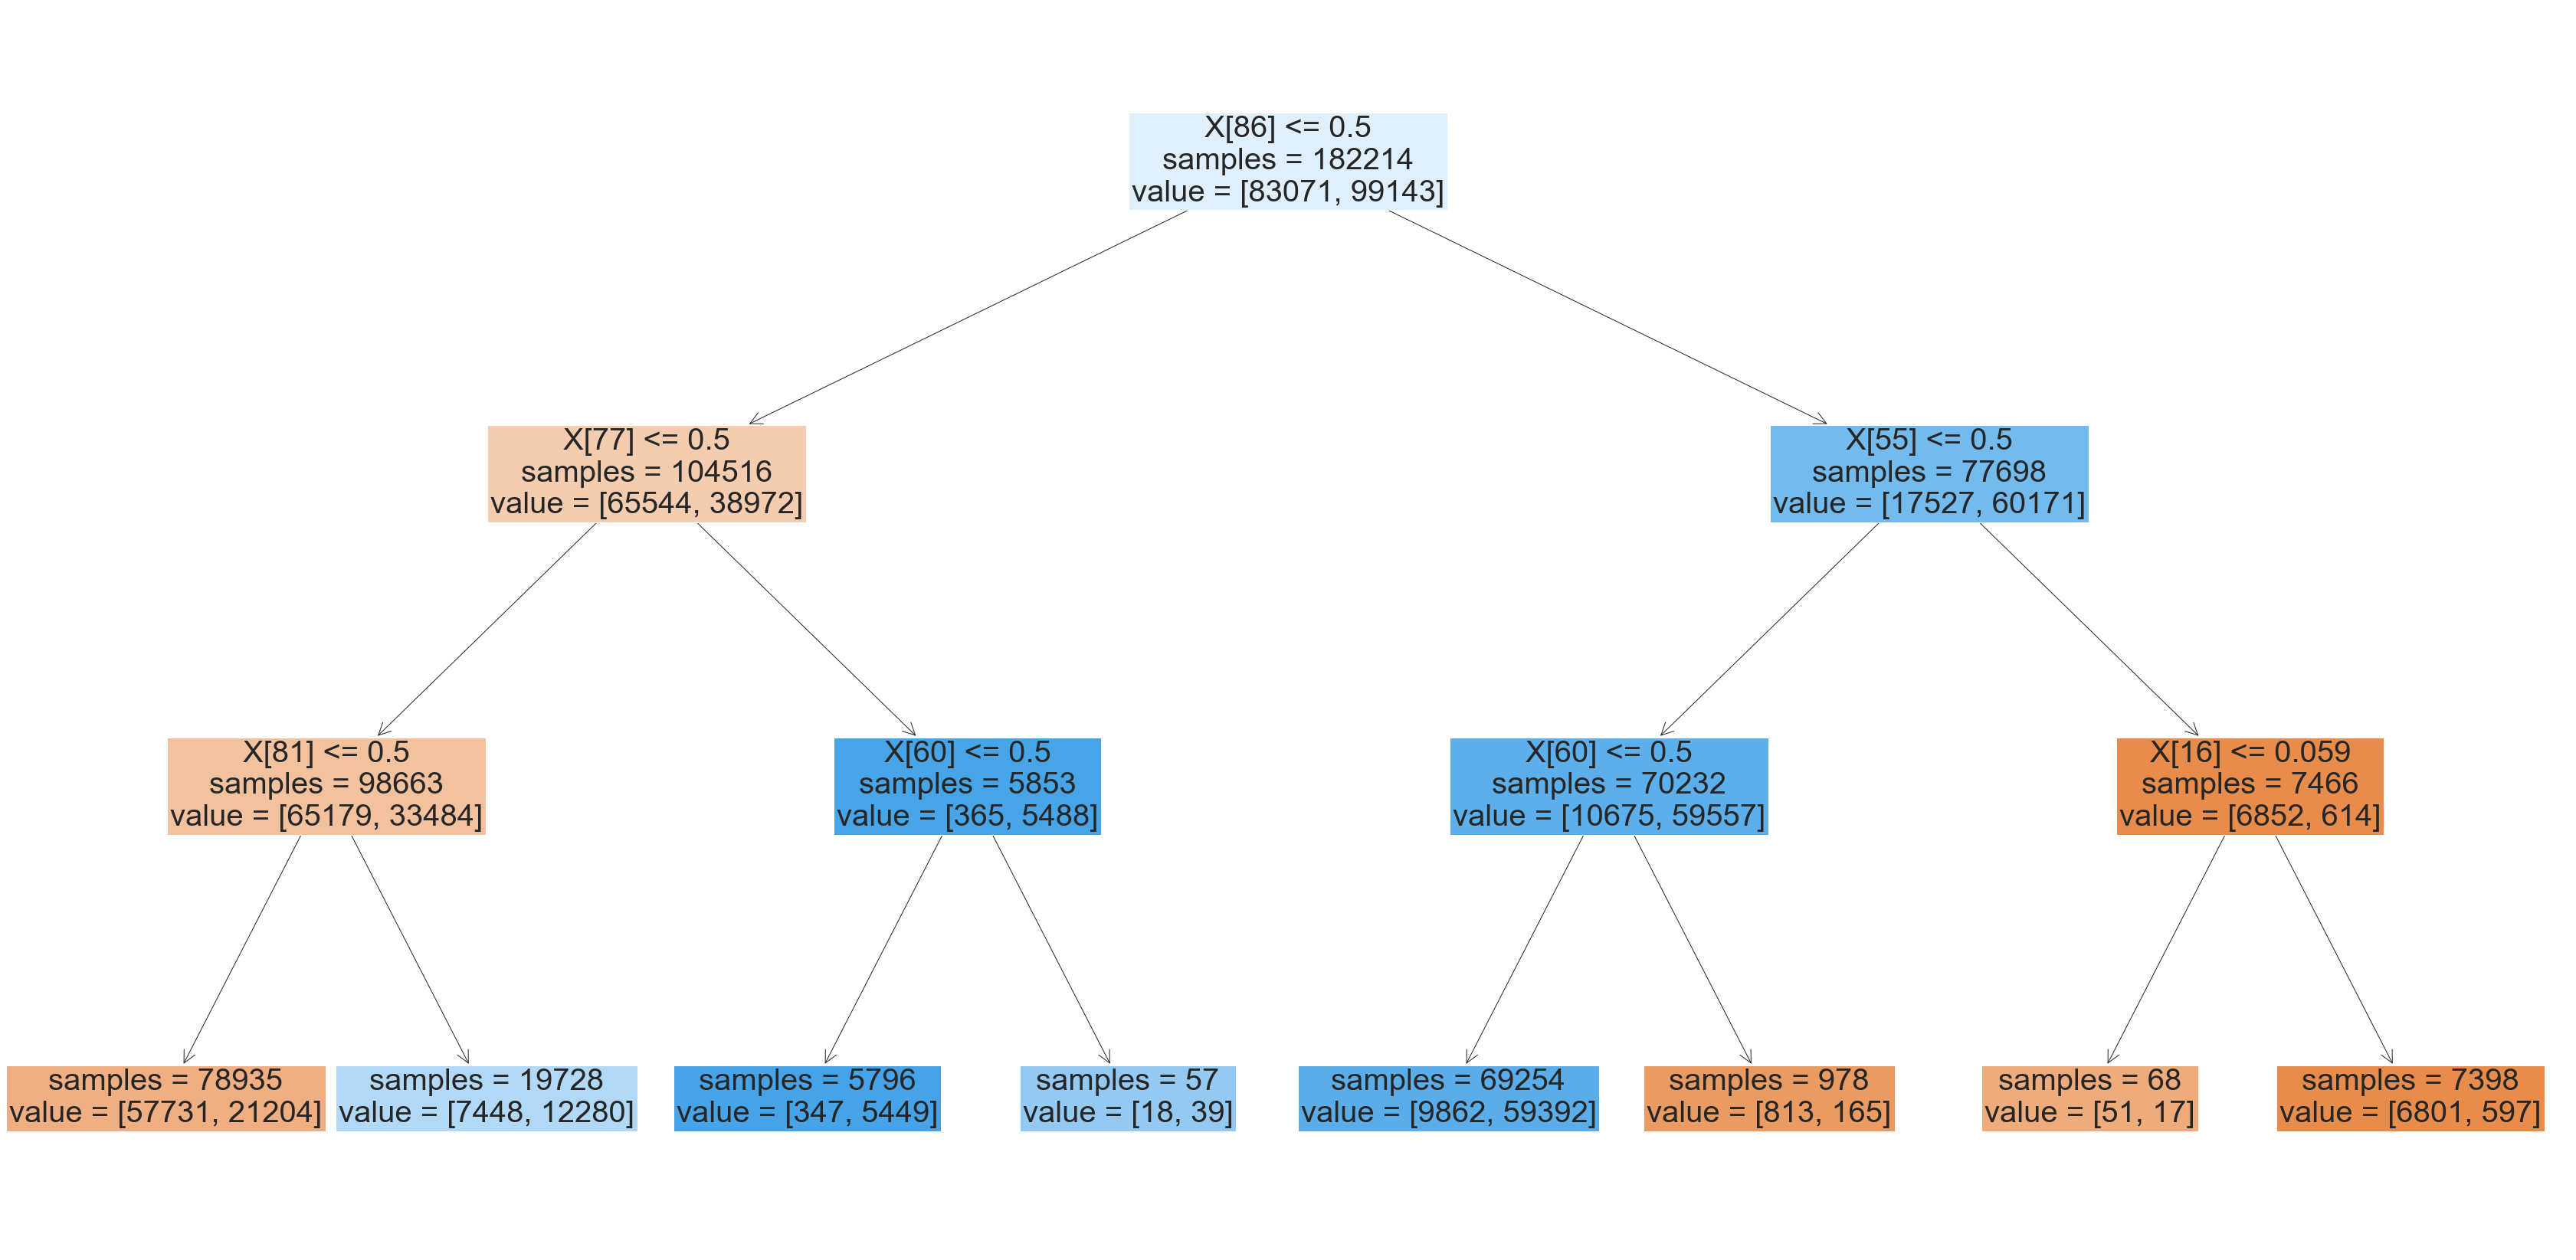

In [139]:
# Plotting
plt.figure(figsize=(60,30)) 
tree.plot_tree(dt_model1, fontsize=40, impurity=False, filled=True)
plt.show()

Looks like Violence & Sexual Offences (X[86]) is again the most important predictor.

Now we can get class predictions as well as MEA's & R^2 for train and validation sets:

In [140]:
## Make predictions 
y_pred_train = dt_model.predict(X_train)
y_pred = dt_model.predict(X_validation)

# Evaluate model
print(f'Train Mean Absolute Error --- {mean_absolute_error(y_train, y_pred_train)}')
print(f'Validation Mean Absolute Error ---- {mean_absolute_error(y_validation, y_pred)}')
print(f'Train R2 ---- {r2_score(y_train, y_pred_train)}')
print(f'Validation R2 ----- {r2_score(y_validation, y_pred)}')

Train Mean Absolute Error --- 0.18636877517644088
Validation Mean Absolute Error ---- 0.18833954387717208
Train R2 ---- 0.24867967065100927
Validation R2 ----- 0.24050631776405007


R2 scores seem pretty low despite the fairly high performance of the decision tree. Now let's look at confusion matrix.

In [141]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_validation, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Suspect Not Identified", "Predicted Suspect Identified"],
    index=["True Suspect Not Identified", "True Suspect Identified"]
)

display(cf_df)

Predicted Suspect Not Identified  \
True Suspect Not Identified                             28599   
True Suspect Identified                                  7770   

                             Predicted Suspect Identified  
True Suspect Not Identified                          6938  
True Suspect Identified                             34786

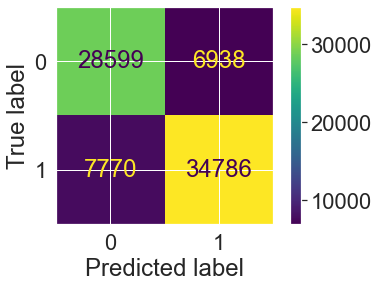

In [142]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(dt_model, X_validation, y_validation);

In [143]:
# Let's look at the report
report = classification_report(y_validation, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80     35537
           1       0.83      0.82      0.83     42556

    accuracy                           0.81     78093
   macro avg       0.81      0.81      0.81     78093
weighted avg       0.81      0.81      0.81     78093



In [144]:
# Filling in the temporary model score
model_scores_temp = pd.DataFrame({'Name': ["Decision Tree"], 'Transformation': ["Scaled data (optional)"], 'Optimization': ["max_depth = 8"], 'Features': ['87'], 'Accuracy on Validation': [Decision_Tree.score(X_validation, y_validation)*100], 'F1-score on Validation': [f1_score(y_validation, y_pred)*100]})

In [145]:
# Keeping score
model_scores = model_scores.append(model_scores_temp, ignore_index=True)
model_scores

Name                 Transformation   Optimization  \
0  Base Logistic Model                           None           None   
1     Logistic Model 1                    Scaled data           None   
2     Logistic Model 2                    Scaled data          C=0.1   
3     Logistic Model 3  Scaled & log-transformed data          C=0.1   
4     Logistic Model 4                    Scaled data          C=0.1   
5     Logistic Model 5                    Scaled data          C=0.1   
6     Logistic Model 6                    Scaled data          C=0.1   
7        Decision Tree         Scaled data (optional)  max_depth = 8   

                      Features  Accuracy on Validation  F1-score on Validation  
0                           87                   61.45                   69.17  
1                           87                   81.32                   83.06  
2                           87                   81.32                   83.05  
3                           87                   81.32                   83.06  
4                      81 (VT)                   81.33                   83.06  
5  44 (VT & Feature Selection)                   81.38                   83.10  
6                   28 (KBest)                   63.58                   71.56  
7                           87                   81.17                   82.55

Looks like the Decision Tree model is up there but is still subpar to Logistic Model 5. Let's now try Random Forest.

<a id='4'></a>
## 4) Random Forest

We can start Random Forest on our unscaled data.

Let's look at the various estimators to see which one is optimal for our data. This will take a while.

In [146]:
# Let's look at the # of estimators
n_estimators_range = range(1, 30)

# Store the results
results = pd.DataFrame()

# Loop with different estimators
for n_est in n_estimators_range:
    my_rf = RandomForestClassifier(n_estimators=n_est)

    my_rf.fit(X_train, y_train)
    
    train_score = my_rf.score(X_train, y_train)
    validation_score = my_rf.score(X_validation, y_validation)
    
    results = results.append(
        {"n_estimators": n_est, "train": train_score, "validation": validation_score},
        ignore_index=True
    )
    
    print(n_est, end="\r")

Let's plot the results:

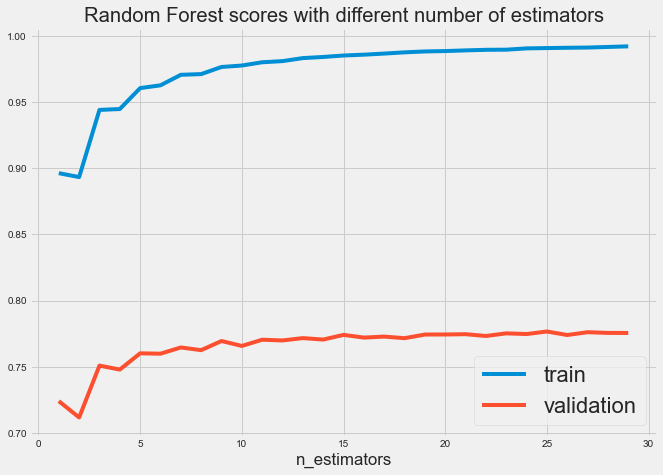

In [149]:
# Setting the style
with plt.style.context('fivethirtyeight'):
# Initiating the plot
    plt.figure(figsize=(10, 7))
    # Plotting
    results.plot(x="n_estimators", y=["train", "validation"], kind="line", ax=plt.gca())
    plt.legend()
    plt.title("Random Forest scores with different number of estimators")
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Showing
    plt.show()

This clearly overfits so we can now run another loop to figure our max_depth:

In [150]:
# Create a dataframe to store results
rf = pd.DataFrame()

# We will loop through esetimators from 1-50 jumping by 2
n_est = np.arange(1, 51, 2)

# We will loop through depth from 1-6
depth = np.arange(1, 6)

# Looping
for n in n_est:
    for d in depth:
        print(f"Fitting with number of estimators = {n}")
        print(f"Fitting with max depth = {d}")
        
        #instantiate and fit model
        RF_2 = RandomForestClassifier(n_estimators = n, max_depth = d)
        RF_2.fit(X_train, y_train)
        
        # score on train and append accuracy to list
        train_score = RF_2.score(X_train, y_train)
        
        # score on test and append to list
        val_score = RF_2.score(X_validation, y_validation)
        rf = rf.append(
        {"n_estimators": n, 'max_depth': d, "train": train_score, "validation": val_score},ignore_index = True
        )

Fitting with number of estimators = 1
Fitting with max depth = 1
Fitting with number of estimators = 1
Fitting with max depth = 2
Fitting with number of estimators = 1
Fitting with max depth = 3
Fitting with number of estimators = 1
Fitting with max depth = 4
Fitting with number of estimators = 1
Fitting with max depth = 5
Fitting with number of estimators = 3
Fitting with max depth = 1
Fitting with number of estimators = 3
Fitting with max depth = 2
Fitting with number of estimators = 3
Fitting with max depth = 3
Fitting with number of estimators = 3
Fitting with max depth = 4
Fitting with number of estimators = 3
Fitting with max depth = 5
Fitting with number of estimators = 5
Fitting with max depth = 1
Fitting with number of estimators = 5
Fitting with max depth = 2
Fitting with number of estimators = 5
Fitting with max depth = 3
Fitting with number of estimators = 5
Fitting with max depth = 4
Fitting with number of estimators = 5
Fitting with max depth = 5
Fitting with number of es

In [151]:
# Let's look at the scores
rf

n_estimators  max_depth  train  validation
0            1.00       1.00   0.59        0.59
1            1.00       2.00   0.70        0.70
2            1.00       3.00   0.69        0.69
3            1.00       4.00   0.72        0.72
4            1.00       5.00   0.67        0.67
..            ...        ...    ...         ...
120         49.00       1.00   0.68        0.68
121         49.00       2.00   0.72        0.72
122         49.00       3.00   0.71        0.71
123         49.00       4.00   0.75        0.75
124         49.00       5.00   0.76        0.76

[125 rows x 4 columns]

In [152]:
# Looking at the top validation score
rf.sort_values("validation", ascending=False, inplace=True)
rf.head(1)

n_estimators  max_depth  train  validation
79         31.00       5.00   0.79        0.79

The best parameters for the Random Forests is 31 estimators and max_depth = 5

Now let's run the model:

In [153]:
# Initiate the model
my_rf = RandomForestClassifier(n_estimators=31, max_depth=5, random_state=2307)

# Fit the model
my_rf.fit(X_train, y_train)

# Find the most important features
feature_df = pd.DataFrame(
    {"feature_importance": my_rf.feature_importances_},
    index=X_train.columns
)

# Score the model
print(f"Random Forest train: {my_rf.score(X_train, y_train)}")
print(f"Random Forest validation: {my_rf.score(X_validation, y_validation)}")

Random Forest train: 0.7834085196527161
Random Forest validation: 0.7846669996030374


In [154]:
# See the most important features
feature_df.sort_values("feature_importance", ascending=False, inplace=True)
feature_df

feature_importance
('Violence and sexual offences',)                0.20
('Metropolitan Police Service',)                 0.12
Median_House_Price                               0.09
('Vehicle crime',)                               0.07
('Other theft',)                                 0.05
...                                               ...
('Nottinghamshire Police',)                      0.00
('Leicestershire Police',)                       0.00
('Northamptonshire Police',)                     0.00
('North Yorkshire Police',)                      0.00
('Dyfed-Powys Police',)                          0.00

[87 rows x 1 columns]

Similar to Decision Trees, Random Forests denotes Violence and Sexual Offences as the most important feature.

Now we can get class predictions:

In [155]:
# Get class predictions
y_pred = my_rf.predict(X_validation)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_validation, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Suspect Not Identified", "Predicted Suspect Identified"],
    index=["True Suspect Not Identified", "True Suspect Identified"]
)

display(cf_df)

Predicted Suspect Not Identified  \
True Suspect Not Identified                             24739   
True Suspect Identified                                  6018   

                             Predicted Suspect Identified  
True Suspect Not Identified                         10798  
True Suspect Identified                             36538

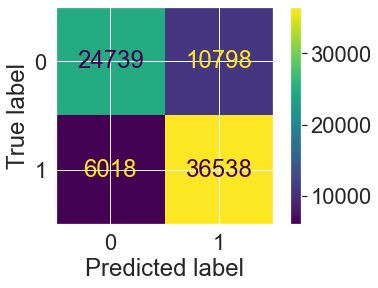

In [156]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(my_rf, X_validation, y_validation);

In [157]:
# Let's look at the report
report = classification_report(y_validation, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.70      0.75     35537
           1       0.77      0.86      0.81     42556

    accuracy                           0.78     78093
   macro avg       0.79      0.78      0.78     78093
weighted avg       0.79      0.78      0.78     78093



In [158]:
# Filling in the temporary model score
model_scores_temp = pd.DataFrame({'Name': ["Random Forest"], 'Transformation': ["None"], 'Optimization': ["n_estimators=31, max_depth=5"], 'Features': ['87'], 'Accuracy on Validation': [my_rf.score(X_validation, y_validation)*100], 'F1-score on Validation': [f1_score(y_validation, y_pred)*100]})

In [159]:
# Keeping score
model_scores = model_scores.append(model_scores_temp, ignore_index=True)
model_scores

Name                 Transformation  \
0  Base Logistic Model                           None   
1     Logistic Model 1                    Scaled data   
2     Logistic Model 2                    Scaled data   
3     Logistic Model 3  Scaled & log-transformed data   
4     Logistic Model 4                    Scaled data   
5     Logistic Model 5                    Scaled data   
6     Logistic Model 6                    Scaled data   
7        Decision Tree         Scaled data (optional)   
8        Random Forest                           None   

                   Optimization                     Features  \
0                          None                           87   
1                          None                           87   
2                         C=0.1                           87   
3                         C=0.1                           87   
4                         C=0.1                      81 (VT)   
5                         C=0.1  44 (VT & Feature Selection)   
6                         C=0.1                   28 (KBest)   
7                 max_depth = 8                           87   
8  n_estimators=31, max_depth=5                           87   

   Accuracy on Validation  F1-score on Validation  
0                   61.45                   69.17  
1                   81.32                   83.06  
2                   81.32                   83.05  
3                   81.32                   83.06  
4                   81.33                   83.06  
5                   81.38                   83.10  
6                   63.58                   71.56  
7                   81.17                   82.55  
8                   78.47                   81.29

Looks like Logistic Model 5 is still our best model (by a very narrow margin).

<a id='5'></a>
## 5. Model Evaluation

<a id='5a'></a>
### 5a. Selecting the best model

In [160]:
# Let's look at the scores again
model_scores

Name                 Transformation  \
0  Base Logistic Model                           None   
1     Logistic Model 1                    Scaled data   
2     Logistic Model 2                    Scaled data   
3     Logistic Model 3  Scaled & log-transformed data   
4     Logistic Model 4                    Scaled data   
5     Logistic Model 5                    Scaled data   
6     Logistic Model 6                    Scaled data   
7        Decision Tree         Scaled data (optional)   
8        Random Forest                           None   

                   Optimization                     Features  \
0                          None                           87   
1                          None                           87   
2                         C=0.1                           87   
3                         C=0.1                           87   
4                         C=0.1                      81 (VT)   
5                         C=0.1  44 (VT & Feature Selection)   
6                         C=0.1                   28 (KBest)   
7                 max_depth = 8                           87   
8  n_estimators=31, max_depth=5                           87   

   Accuracy on Validation  F1-score on Validation  
0                   61.45                   69.17  
1                   81.32                   83.06  
2                   81.32                   83.05  
3                   81.32                   83.06  
4                   81.33                   83.06  
5                   81.38                   83.10  
6                   63.58                   71.56  
7                   81.17                   82.55  
8                   78.47                   81.29

Looks like our Logistic Model 5 is the best in terms of accuracy, F1 score and interpretability, so we'll go ahead and score it on the test data. For that, we will need to transform our test data based on the process earlier in the notebook.

In [161]:
# Scaling X_test
X_test = my_minmax_scaler.transform(X_test)

# Creating a dataframe
X_test_df = pd.DataFrame(data = X_test, columns=column_names)

# Select features
X_test = X_test_df.pipe(keep_cols, np.array(features_list))

# Dropping columns
X_test.drop(axis=0, columns=['Proportion_45-64', 'FSM11to15Proportion', 'WBR Proportion'], inplace=True)

X_test.head()

Latitude  Proportion_16-29  #_ppl_hhld  Deprivation_Index  BAF Proportion  \
0      0.49              0.15        0.29               0.13            0.01   
1      0.67              0.13        0.43               0.00            0.01   
2      0.34              0.12        0.36               0.45            0.01   
3      0.53              0.17        0.40               0.09            0.02   
4      0.66              0.15        0.35               0.03            0.02   

   BCA Proportion  OXX Proportion  AAB Proportion  Population_Density  \
0            0.02            0.02            0.04                0.07   
1            0.01            0.02            0.02                0.06   
2            0.00            0.00            0.01                0.06   
3            0.01            0.01            0.02                0.04   
4            0.04            0.02            0.02                0.09   

   Median_House_Price  ('Avon and Somerset Constabulary',)  \
0                0.03                                 0.00   
1                0.01                                 0.00   
2                0.05                                 0.00   
3                0.02                                 0.00   
4                0.01                                 0.00   

   ('Cleveland Police',)  ('Cumbria Constabulary',)  \
0                   0.00                       0.00   
1                   0.00                       0.00   
2                   0.00                       0.00   
3                   0.00                       0.00   
4                   0.00                       0.00   

   ('Derbyshire Constabulary',)  ('Dorset Police',)  ('Durham Constabulary',)  \
0                          0.00                0.00                      0.00   
1                          0.00                0.00                      0.00   
2                          0.00                0.00                      0.00   
3                          0.00                0.00                      0.00   
4                          0.00                0.00                      0.00   

   ('Gloucestershire Constabulary',)  ('Hampshire Constabulary',)  \
0                               0.00                         0.00   
1                               0.00                         0.00   
2                               0.00                         0.00   
3                               0.00                         0.00   
4                               0.00                         0.00   

   ('Hertfordshire Constabulary',)  ('Humberside Police',)  ('Kent Police',)  \
0                             0.00                    0.00              0.00   
1                             0.00                    0.00              0.00   
2                             0.00                    0.00              0.00   
3                             0.00                    0.00              0.00   
4                             0.00                    0.00              0.00   

   ('Lancashire Constabulary',)  ('Merseyside Police',)  \
0                          0.00                    0.00   
1                          1.00                    0.00   
2                          0.00                    0.00   
3                          0.00                    0.00   
4                          1.00                    0.00   

   ('Metropolitan Police Service',)  ('Norfolk Constabulary',)  \
0                              0.00                       0.00   
1                              0.00                       0.00   
2                              0.00                       0.00   
3                              0.00                       0.00   
4                              0.00                       0.00   

   ('North Yorkshire Police',)  ('Northumbria Police',)  \
0                         0.00                     0.00   
1                         0.00                     0.00   
2                         0.00                     0.00   
3       

In [162]:
# Check the size
X_test.shape

(65077, 44)

Now we're ready to score on X_test:

<a id='5b'></a>
### 5b. Scoring the best model on Test data

In [164]:
# Score the model
scores_test = logreg_featsel1.score(X_test, y_test)

# Print the accuracy scores

print("Score on test:", "{:.2f}".format(scores_test*100))

Score on test: 80.87


This is slightly lower than 81.38 on our validation set but still quite good given that our dependent variable classes are balanced.

<a id='5c'></a>
### 5c. Model Interpretation

Let's now look at our features and pvalues

In [207]:
scores, pvalues_array = chi2(X_test, y_test)

# Assigning coefficients to a list
coef_table = logreg_featsel1.coef_

# Creating a PD dataframe with the coefficients
coef_table = pd.DataFrame(list(X_test.columns)).copy()
coef_table.insert(len(coef_table.columns), "Coefficients", logreg_featsel1.coef_.transpose())

# Renaming the first column to Features
coef_table.rename(columns = {0:'Features'}, inplace = True)

# Creating a dataframe
pvalues = pd.DataFrame(data=pvalues_array)

# Adding odds ratios
coef_table.insert(len(coef_table.columns), "Odds Ratios", np.exp(logreg_featsel1.coef_.transpose()))

# Adding p-values
coef_table.insert(len(coef_table.columns), "P-values", pvalues)

# Looking at the result
coef_table

Features  Coefficients  Odds Ratios  P-values
0                              Latitude         -0.39         0.68      0.00
1                      Proportion_16-29         -0.47         0.63      0.02
2                            #_ppl_hhld         -0.39         0.68      0.03
3                     Deprivation_Index         -0.32         0.73      0.00
4                        BAF Proportion         -0.51         0.60      0.00
5                        BCA Proportion          0.04         1.04      0.00
6                        OXX Proportion         -0.76         0.47      0.00
7                        AAB Proportion         -0.13         0.88      0.00
8                    Population_Density          0.36         1.43      0.00
9                    Median_House_Price         -0.90         0.41      0.00
10  ('Avon and Somerset Constabulary',)          3.14        23.14      0.00
11                ('Cleveland Police',)          0.35         1.42      0.00
12            ('Cumbria Constabulary',)          0.61         1.85      0.00
13         ('Derbyshire Constabulary',)          0.26         1.30      0.00
14                   ('Dorset Police',)          0.17         1.18      0.00
15             ('Durham Constabulary',)          0.35         1.41      0.00
16    ('Gloucestershire Constabulary',)          0.39         1.48      0.00
17          ('Hampshire Constabulary',)         -0.35         0.71      0.00
18      ('Hertfordshire Constabulary',)          0.26         1.30      0.45
19               ('Humberside Police',)          0.33         1.38      0.00
20                     ('Kent Police',)          0.17         1.18      0.00
21         ('Lancashire Constabulary',)          0.37         1.45      0.00
22               ('Merseyside Police',)         -0.08         0.92      0.00
23     ('Metropolitan Police Service',)         -3.09         0.05      0.00
24            ('Norfolk Constabulary',)          0.72         2.05      0.00
25          ('North Yorkshire Police',)          0.62         1.85      0.00
26              ('Northumbria Police',)         -2.63         0.07      0.00
27            ('Suffolk Constabulary',)          0.45         1.57      0.00
28                   ('Sussex Police',)         -0.57         0.57      0.19
29             ('Warwickshire Police',)          0.41         1.51      0.00
30              ('West Mercia Police',)          0.46         1.58      0.00
31            ('West Midlands Police',)         -0.59         0.56      0.00
32                   ('Bicycle theft',)         -2.20         0.11      0.00
33                        ('Burglary',)         -1.67         0.19      0.00
34       ('Criminal damage and arson',)         -0.75         0.47      0.00
35                           ('Drugs',)          4.24        69.55      0.00
36                     ('Other crime',)          1.28         3.60      0.00
37                     ('Other theft',)         -1.26         0.28      0.00
38           ('Possession of weapons',)          1.86         6.40      0.00
39                    ('Public order',)          0.54         1.72      0.00
40                     ('Shoplifting',)         -0.55         0.58      0.00
41           ('Theft from the person',)         -1.04         0.35      0.00
42                   ('Vehicle crime',)         -2.17         0.11      0.00
43    ('Violence and sexual offences',)          1.43         4.18      0.00

Getting rid of a couple of features with too high p-values:

In [208]:
# Only leaving the features that have p<0.005
coef_table = coef_table.loc[coef_table['P-values'] < 0.05]
coef_table

Features  Coefficients  Odds Ratios  P-values
0                              Latitude         -0.39         0.68      0.00
1                      Proportion_16-29         -0.47         0.63      0.02
2                            #_ppl_hhld         -0.39         0.68      0.03
3                     Deprivation_Index         -0.32         0.73      0.00
4                        BAF Proportion         -0.51         0.60      0.00
5                        BCA Proportion          0.04         1.04      0.00
6                        OXX Proportion         -0.76         0.47      0.00
7                        AAB Proportion         -0.13         0.88      0.00
8                    Population_Density          0.36         1.43      0.00
9                    Median_House_Price         -0.90         0.41      0.00
10  ('Avon and Somerset Constabulary',)          3.14        23.14      0.00
11                ('Cleveland Police',)          0.35         1.42      0.00
12            ('Cumbria Constabulary',)          0.61         1.85      0.00
13         ('Derbyshire Constabulary',)          0.26         1.30      0.00
14                   ('Dorset Police',)          0.17         1.18      0.00
15             ('Durham Constabulary',)          0.35         1.41      0.00
16    ('Gloucestershire Constabulary',)          0.39         1.48      0.00
17          ('Hampshire Constabulary',)         -0.35         0.71      0.00
19               ('Humberside Police',)          0.33         1.38      0.00
20                     ('Kent Police',)          0.17         1.18      0.00
21         ('Lancashire Constabulary',)          0.37         1.45      0.00
22               ('Merseyside Police',)         -0.08         0.92      0.00
23     ('Metropolitan Police Service',)         -3.09         0.05      0.00
24            ('Norfolk Constabulary',)          0.72         2.05      0.00
25          ('North Yorkshire Police',)          0.62         1.85      0.00
26              ('Northumbria Police',)         -2.63         0.07      0.00
27            ('Suffolk Constabulary',)          0.45         1.57      0.00
29             ('Warwickshire Police',)          0.41         1.51      0.00
30              ('West Mercia Police',)          0.46         1.58      0.00
31            ('West Midlands Police',)         -0.59         0.56      0.00
32                   ('Bicycle theft',)         -2.20         0.11      0.00
33                        ('Burglary',)         -1.67         0.19      0.00
34       ('Criminal damage and arson',)         -0.75         0.47      0.00
35                           ('Drugs',)          4.24        69.55      0.00
36                     ('Other crime',)          1.28         3.60      0.00
37                     ('Other theft',)         -1.26         0.28      0.00
38           ('Possession of weapons',)          1.86         6.40      0.00
39                    ('Public order',)          0.54         1.72      0.00
40                     ('Shoplifting',)         -0.55         0.58      0.00
41           ('Theft from the person',)         -1.04         0.35      0.00
42                   ('Vehicle crime',)         -2.17         0.11      0.00
43    ('Violence and sexual offences',)          1.43         4.18      0.00

In [209]:
table_max = coef_table.drop(axis=1, columns=['P-values', 'Coefficients'])

In [210]:
# Sorting
table_max.sort_values(by="Odds Ratios", ascending=False, inplace=True)
# Setting Index
table_max.set_index('Features', inplace=True)

In [211]:
table_max

Odds Ratios
Features                                        
('Drugs',)                                 69.55
('Avon and Somerset Constabulary',)        23.14
('Possession of weapons',)                  6.40
('Violence and sexual offences',)           4.18
('Other crime',)                            3.60
('Norfolk Constabulary',)                   2.05
('North Yorkshire Police',)                 1.85
('Cumbria Constabulary',)                   1.85
('Public order',)                           1.72
('West Mercia Police',)                     1.58
('Suffolk Constabulary',)                   1.57
('Warwickshire Police',)                    1.51
('Gloucestershire Constabulary',)           1.48
('Lancashire Constabulary',)                1.45
Population_Density                          1.43
('Cleveland Police',)                       1.42
('Durham Constabulary',)                    1.41
('Humberside Police',)                      1.38
('Derbyshire Constabulary',)                1.30
('Kent Police',)                            1.18
('Dorset Police',)                          1.18
BCA Proportion                              1.04
('Merseyside Police',)                      0.92
AAB Proportion                              0.88
Deprivation_Index                           0.73
('Hampshire Constabulary',)                 0.71
Latitude                                    0.68
#_ppl_hhld                                  0.68
Proportion_16-29                            0.63
BAF Proportion                              0.60
('Shoplifting',)                            0.58
('West Midlands Police',)                   0.56
('Criminal damage and arson',)              0.47
OXX Proportion                              0.47
Median_House_Price                          0.41
('Theft from the person',)                  0.35
('Other theft',)                            0.28
('Burglary',)                               0.19
('Vehicle crime',)                          0.11
('Bicycle theft',)                          0.11
('Northumbria Police',)                     0.07
('Metropolitan Police Service',)            0.05

In [217]:
# Getting 10 features with highest and lowest odds ratios 
table_head = table_max.head(5)
table_tail = table_max.tail(5)
table_max = table_head.append(table_tail)

In [225]:
# Let's take a look
table_max

Odds Ratios
Features                                        
('Drugs',)                                 69.55
('Avon and Somerset Constabulary',)        23.14
('Possession of weapons',)                  6.40
('Violence and sexual offences',)           4.18
('Other crime',)                            3.60
('Burglary',)                               0.19
('Vehicle crime',)                          0.11
('Bicycle theft',)                          0.11
('Northumbria Police',)                     0.07
('Metropolitan Police Service',)            0.05

<Figure size 4320x4320 with 0 Axes>

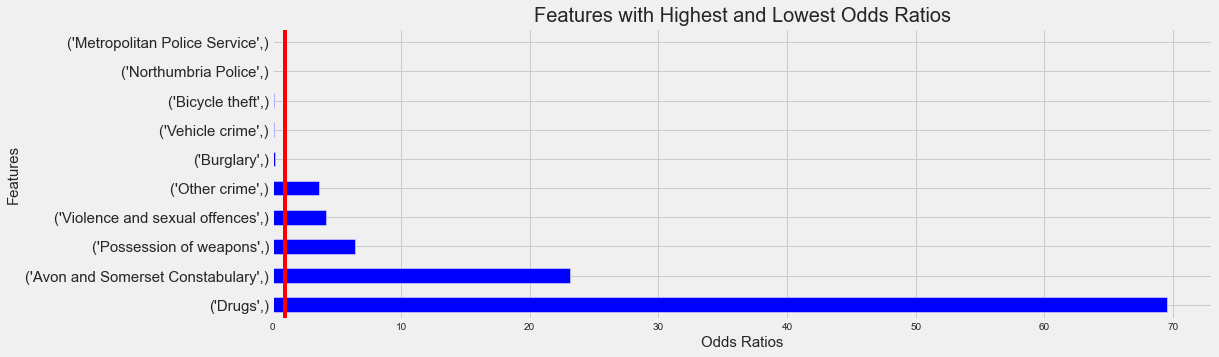

In [226]:
# Setting the style
with plt.style.context('fivethirtyeight'):
# Initiating the plot
    plt.figure(figsize=(60, 60))
    # Plotting
    table_max.plot(kind="barh", figsize=(15, 5), legend=False, color='blue')
    plt.title("Features with Highest and Lowest Odds Ratios", fontsize=20)
    plt.ylabel("Features", fontsize=15)
    plt.xlabel("Odds Ratios", fontsize=15)
    plt.axvline(x=1, c='red')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=15)
    
    # Showing
    plt.show()

Odds ratios with groups quantify the strength of the relationship between two conditions. They indicate how likely an outcome is to occur in one context relative to another.

Odds ratios that are greater than 1 indicate that the even is more likely to occur as the predictor increases. Odds ratios that are less than 1 indicate that the event is less likely to occur as the predictor increases.

Based on the graph, we can say that:

* `Drugs`, `Avon and Somerset Constabulary`, `Possession of Weapons`, `Violence and Sexual Offences`, `Other crime` increases the odds of having a Suspect Identified by ~ 70, 23, 6, 4 and 4 respectively.

* `Burglary`, `Vehicle crime`, `Bicycle theft`, `Northumbria Police` and `Metropolitan Police Service` decrease the odds of having a Suspect Identified by 0.19, 0.11, 0.11, 0.07 and 0.05 respectively.


It is to be expected that the most significant predictors of whether the Suspect is Identified or not are Crime Types and differences Police departments. Unsurprisingly, crimes where suspects are identified are mostly related to posession offences, while the ones where suspects are not identified are mostly related to theft. 

It is also notable to see big differences across various police departments highlighting inequities across the UK. It is recommended that the UK government focus on training forces in police departments in Northumbria Police and Metropolitan Police Service given their poor track record in identifying suspects.

Now let's look at demographic factors influencing whether suspect is identified or not. While they are not the highest, they still have predictive power:

In [229]:
# Creating table with demographic features
demographic=coef_table.iloc[0:10].copy()

# Creating a new table
demographic = demographic.drop(axis=1, columns=['P-values', 'Coefficients'])
demographic.sort_values("Odds Ratios", ascending=False, inplace=True)

# Setting Index
demographic.set_index('Features', inplace=True)

In [231]:
 # let's view the table
demographic

Odds Ratios
Features                       
Population_Density         1.43
BCA Proportion             1.04
AAB Proportion             0.88
Deprivation_Index          0.73
Latitude                   0.68
#_ppl_hhld                 0.68
Proportion_16-29           0.63
BAF Proportion             0.60
OXX Proportion             0.47
Median_House_Price         0.41

<Figure size 4320x4320 with 0 Axes>

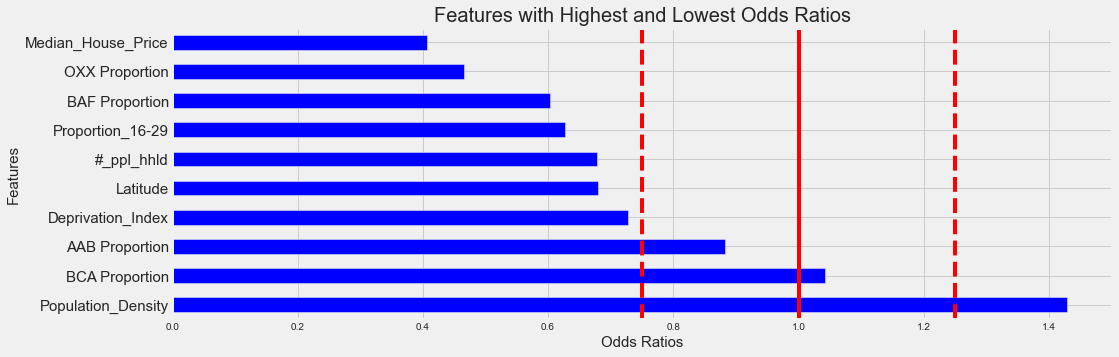

In [234]:
# Setting the style
with plt.style.context('fivethirtyeight'):
# Initiating the plot
    plt.figure(figsize=(60, 60))
    # Plotting
    demographic.plot(kind="barh", figsize=(15, 5), legend=False, color='blue')
    plt.title("Features with Highest and Lowest Odds Ratios", fontsize=20)
    plt.ylabel("Features", fontsize=15)
    plt.xlabel("Odds Ratios", fontsize=15)
    plt.axvline(x=1, c='red')
    plt.axvline(x=0.75, c='red', linestyle='--')
    plt.axvline(x=1.25, c='red', linestyle='--')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=15)
    
    # Showing
    plt.show()

We're only going to look at features with significant impact, i.e., where Odds Ratios are lower than 0.75 and higher than 1.25.

With this, we can see that:

**There is a lower likelihood of suspect being identified in neighborhoods where:**
* Median House Prices and Deprivation Indexes are high, possibly indicating underpolicing in affluent neighborhoods
* There is a high proportion of Black African and Other Ethnicities, possibly indicating lower level of police involvement in these neighborhoods
* Younger neighborhoods with a higher proportion of 16-29 year olds, possibly indicating that these individuals may not yet be known to the police
* Higher number of people in household, possibly indicating poorer neighborhoods with multi-generational settings
* Latitude is higher, possibly indicating a geographic impact
   
**There is a higher likelihood of suspect being identified in neighborhoods where:**
* Population density is high, possibly indicating a more trained police force in more populated urban areas

In summary, we recommend that the UK Government look at the findings from this data to provide further training to police service forces, and look into overpolicing and underpolicing inequities that exist across the country.